In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
from collections import Counter
from statsmodels.api import Logit

import seaborn as sns
%matplotlib inline

In [2]:
matplotlib.rc("font", family="NanumGothic")

In [43]:
#==================================================================
# fun_check_class_level(v_data, v_start=None, v_pattern=None)
# 범주형 변수 수준 및 자료 수 확인
# -.input:
# v_data:input data, v_start:입력 문자로 시작하는 변수명 탐색, v_pattern:입력 문자를 포함하는 변수명 탐색
# -call function:fun_select_cols
# -.output:
#
#==================================================================
def fun_check_class_level(v_data, v_start=None, v_pattern=None):

    for v_col in list_cols:
        print()    
        print("변수: ", v_col, "Level = ",Counter(v_data[v_col]))

#=======================다===========================================
# fun_plot_hist(v_data, yvar, xvar, alpha = 0.5)
# Histogram, 범주형 변수의 수준(level)별 색깔 구분
# -.input:
# v_data:input data, yvar:목표변수(범주형), x:분석변수(연속형), alpha:transparency(투명도)
# -.output:
#
#==================================================================
def fun_plot_hist(v_data, yvar, xvar, alpha = 0.5):
    levels = v_data[yvar].unique()
    for level in levels:
        plt.hist(v_data[v_data[yvar] == level][xvar], label = level, alpha = alpha)
    plt.title(xvar)
    plt.legend()

#==================================================================
# fun_stat_by_class(v_data, var_anal, var_class = "JUDGE")
# 범주형 변수 수준별 분석 변수 통계량 생성
# -.input:
#   v_data:input data, var_class:범주형 변수, var_anal:분석 변수
# -.output:
#
#==================================================================
def fun_bstat_by_class(v_data, var_anal, var_class ):    
    _tmp = v_data.groupby(var_class)[var_anal].describe().T
    _tmp.reset_index(inplace = True)
    return pd.pivot_table(data = _tmp, index = "level_0", columns = "level_1", values = list(np.unique(v_data[var_class])))

#==================================================================
# fun_anova(v_data, yvar, xvar)
# 분산분석(ANOVA), stats.f_oneway() 활용
# -.input:다
# v_data:input data, yvar:목표변수(범주형), x:분석변수(연속형) -일반적인 명칭 구분과 상이함
# -.output:
# fv:F 통계량, pv:p-value(F)다
#
#==================================================================
def fun_anova(v_data, yvar, xvar):
    dict_data = dict()
    y_level = v_data[yvar].unique()
    for i in y_level:
        dict_data[i] = v_data[v_data[yvar] == i][xvar]
    fv, pv = stats.f_oneway(dict_data[y_level[0]], dict_data[y_level[1]])
   
    #print("분석 통계량 => ")
    #print("statistic:(F) {0:.3f}, p-value: {1:.3f}".format(fv, pv))
    return fv, pv

#==================================================================
# fun_chi2(v_data, yvar, xvar, heatmap = True, print_crosstab = True)
# 카이제곱 분석
# -.input:다
#   v_data:input data, yvar:Y축, 목표변수(범주형), xvar:X축, 분석변수(범주형),
#   heatmap:heatmap 표시, print_crosstab:교차표(cross tabulate) 표시
# -.output:
#
#==================================================================
def fun_chi2(v_data, yvar, xvar, heatmap = True, print_crosstab = True):    
    _tmp_cross = pd.crosstab(v_data[yvar], v_data[xvar])
    chi2, p, dof, expt = stats.chi2_contingency(_tmp_cross)
    print("카이제곱 통계량 =>")
    print("Chi2: {0:.3f}, p-value: {1:.3f}".format(chi2, p))
   
    # heatmap
    if heatmap:
        cmap = sns.cubehelix_palette(as_cmap=True)
        sns.heatmap(_tmp_cross, cmap = cmap, annot=True, fmt="d")
        plt.title(xvar)
        plt.show()
       
    # print data
    if print_crosstab:
        print("교차표(빈도) =>")        
        print(_tmp_cross)
        print()
        print("교차표(확률) =>")            
        print(pd.crosstab(v_data[yvar], v_data[xvar], normalize = "columns"))
    return chi2, p

#==================================================================
# fun_select_cols(v_data, pattern = None, start = None)
# 변수명 선택 및 리스트 생성
# -.input:
# v_data:input data, start:입력 문자로 시작하는 변수명 탐색, pattern:입력 문자를 포함하는 변수명 탐색
# -.output:
#다
#==================================================================
def fun_select_cols(v_data, pattern = None, start = None):
    cols = v_data.columns.tolist()
    if pattern:
        cols = [col for col in cols if col.find(pattern) > -1]
    if start:
        cols = [col for col in cols if col.startswith(start) > 0]
    return cols



# 정제된 Process 데이터

In [6]:
process=pd.read_csv("data/final_process.csv", encoding="cp949")
process.isnull().sum().value_counts()

0    108
dtype: int64

In [156]:
for c in process.columns:
    print(c)

JUDGE
LOT_ID
PANEL_ID
TIME_1BLACK
TIME_2AG
TIME_3BUS
TIME_4DIELEC
TIME_5MGO
TIME_6PHOS
TIME_7PASTE
TIME_8AGING
BLACK_RTD_TEMP_GLASS_START
BLACK_RTD_TEMP_GLASS_END
BLACK_RTD_TEMP_WALL_START
BLACK_RTD_TEMP_WALL_MAX
BLACK_RTD_PRES_START
BLACK_RTD_PRES_END
BLACK_RTD_TEMP_GLASS_OUT
BLACK_RTD_TEMP_HOOD_START
BLACK_RTD_TEMP_HOOD_MAX
AG_RTD_TEMP_GLASS_START
AG_RTD_TEMP_GLASS_END
AG_RTD_TEMP_WALL_START
AG_RTD_TEMP_WALL_MAX
AG_RTD_PRES_START
AG_RTD_PRES_END
AG_RTD_TEMP_GLASS_OUT
AG_RTD_TEMP_HOOD_START
AG_RTD_TEMP_HOOD_MAX
AG_EXPOSURE_TEMP_MASK
BUS_DEVELOP_TEMP_OVEN1
BUS_DEVELOP_TEMP_OVEN2
BUS_DEVELOP_TEMP_OVEN3
BUS_DEVELOP_PH_TANK1
BUS_DEVELOP_TEMP_TANK1
BUS_DEVELOP_PH_TANK1.1
BUS_DEVELOP_TEMP_TANK2
BUS_DEVELOP_PH_TANK1.2
BUS_DEVELOP_TEMP_TANK3
BUS_DEVELOP_PRES1
BUS_DEVELOP_PRES2
BUS_DEVELOP_PRES3
BUS_FIRE_TEMP_HEAT1_CH01
BUS_FIRE_TEMP_HEAT1_CH02
BUS_FIRE_TEMP_HEAT1_CH03
BUS_FIRE_TEMP_HEAT2_CH01
BUS_FIRE_TEMP_HEAT2_CH02
BUS_FIRE_TEMP_HEAT2_CH03
BUS_FIRE_TEMP_KEEP_CH01
BUS_FIRE_TEMP_KEEP_CH02
BUS

In [157]:
process.head(1)

,JUDGE,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,TIME_7PASTE,...,PHOS_FIRE_TEMP_KEEP_CH03,PHOS_FIRE_TEMP_KEEP_CH04,PHOS_FIRE_TEMP_ANEAL_CH01,PHOS_FIRE_TEMP_ANEAL_CH02,PHOS_FIRE_TEMP_ANEAL_CH03,PHOS_FIRE_TEMP_ANEAL_CH04,PHOS_FIRE_EXHAUST_HEAT1,PHOS_FIRE_EXHAUST_HEAT2,PHOS_FIRE_EXHAUST_HEAT3,PHOS_FIRE_EXHAUST_HEAT4
0,양품,LOT-101,PNL-01,2019-04-01 0:01,2019-04-01 5:21,2019-04-01 11:01,2019-04-06 13:41,2019-04-11 3:41,2019-04-03 20:20,2019-04-11 12:41,...,480.0,475.0,443.0,419.0,392.0,372.0,4115.0,3973.0,4432.0,2506.0


In [8]:
process.head(1)

,Unnamed: 0,JUDGE,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,...,PHOS_FIRE_TEMP_KEEP_CH03,PHOS_FIRE_TEMP_KEEP_CH04,PHOS_FIRE_TEMP_ANEAL_CH01,PHOS_FIRE_TEMP_ANEAL_CH02,PHOS_FIRE_TEMP_ANEAL_CH03,PHOS_FIRE_TEMP_ANEAL_CH04,PHOS_FIRE_EXHAUST_HEAT1,PHOS_FIRE_EXHAUST_HEAT2,PHOS_FIRE_EXHAUST_HEAT3,PHOS_FIRE_EXHAUST_HEAT4
0,0,양품,LOT-101,PNL-01,2019-04-01 0:01,2019-04-01 5:21,2019-04-01 11:01,2019-04-06 13:41,2019-04-11 3:41,2019-04-03 20:20,...,480.0,475.0,443.0,419.0,392.0,372.0,4115.0,3973.0,4432.0,2506.0


In [9]:
process.drop("Unnamed: 0", axis=1, inplace=True)

In [15]:
col_list = process.columns
# for c in col_list:
#     print(c)
    
len(col_list[11:])for i in range(96):
    fun_chi2(process, 'JUDGE', col_list[i+11], heatmap = True, print_crosstab = True)
    plt.show()
    print("===============================================================")

96

카이제곱 통계량 =>
Chi2: 250.897, p-value: 0.000


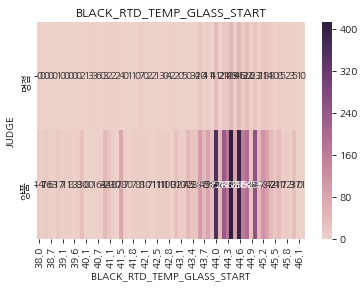

교차표(빈도) =>
BLACK_RTD_TEMP_GLASS_START  38.0  38.1  38.2  38.7  38.8  39.0  39.1  39.2  \
JUDGE                                                                        
명점                             0     0     0     0     0     1     0     0   
양품                            14     7    16     6     3    17     7    11   

BLACK_RTD_TEMP_GLASS_START  39.5  39.6  ...  45.3  45.4  45.5  45.6  45.7  \
JUDGE                                   ...                                 
명점                             0     0  ...    14     8     0     8     5   
양품                             8     3  ...    87    42    21    41     7   

BLACK_RTD_TEMP_GLASS_START  45.8  45.9  46.0  46.1  46.4  
JUDGE                                                     
명점                             2     3     5     1     0  
양품                            12     3    37     0     1  

[2 rows x 68 columns]

교차표(확률) =>
BLACK_RTD_TEMP_GLASS_START  38.0  38.1  38.2  38.7  38.8      39.0  39.1  \
JUDGE               

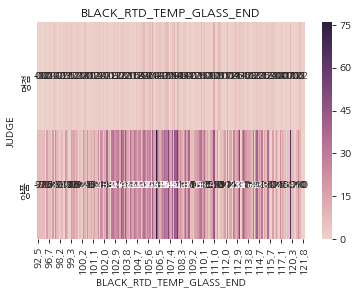

교차표(빈도) =>
BLACK_RTD_TEMP_GLASS_END  92.5   93.1   93.3   93.5   94.0   94.8   95.1   \
JUDGE                                                                       
명점                            0      0      0      1      0      0      0   
양품                            9      7      8      7      7      7      8   

BLACK_RTD_TEMP_GLASS_END  96.2   96.3   96.7   ...  120.4  120.5  120.6  \
JUDGE                                          ...                        
명점                            2      0      0  ...      1      0      0   
양품                            0     17      6  ...      7      7      1   

BLACK_RTD_TEMP_GLASS_END  120.7  120.8  120.9  121.0  121.6  121.8  122.0  
JUDGE                                                                      
명점                            1      2      0      6      2      1      2  
양품                            9      9     22     10      0      0      0  

[2 rows x 218 columns]

교차표(확률) =>
BLACK_RTD_TEMP_GLASS_END  92.5   93.1  

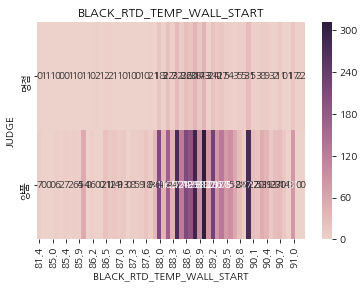

교차표(빈도) =>
BLACK_RTD_TEMP_WALL_START  81.4  84.1  84.8  85.0  85.2  85.3  85.4  85.5  \
JUDGE                                                                       
명점                            0     1     1     1     0     0     0     1   
양품                            7     0     0     0     6     2     7     2   

BLACK_RTD_TEMP_WALL_START  85.8  85.9  ...  90.3  90.4  90.5  90.6  90.7  \
JUDGE                                  ...                                 
명점                            1     0  ...     8     9     3     2    11   
양품                            6     4  ...    51    39    13    27    30   

BLACK_RTD_TEMP_WALL_START  90.8  90.9  91.0  91.1  91.3  
JUDGE                                                    
명점                            0     1    17     2     2  
양품                           14     0    81     0     0  

[2 rows x 60 columns]

교차표(확률) =>
BLACK_RTD_TEMP_WALL_START  81.4  84.1  84.8  85.0  85.2  85.3  85.4      85.5  \
JUDGE                      

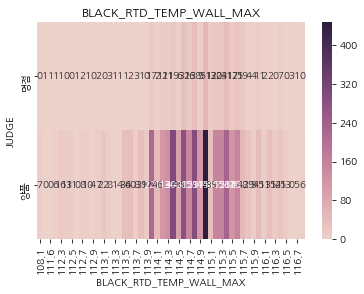

교차표(빈도) =>
BLACK_RTD_TEMP_WALL_MAX  108.1  110.7  111.6  112.2  112.3  112.4  112.5  \
JUDGE                                                                      
명점                           0      1      1      1      1      0      0   
양품                           7      0      0      6     16     13     11   

BLACK_RTD_TEMP_WALL_MAX  112.6  112.7  112.8  ...  115.9  116.0  116.1  116.2  \
JUDGE                                         ...                               
명점                           1      2      1  ...      4     11      2      2   
양품                           0      8     10  ...      9     45     11     35   

BLACK_RTD_TEMP_WALL_MAX  116.3  116.4  116.5  116.6  116.7  116.8  
JUDGE                                                              
명점                           0      7      0      3      1      0  
양품                          14     25     13      0      5      6  

[2 rows x 50 columns]

교차표(확률) =>
BLACK_RTD_TEMP_WALL_MAX  108.1  110.7  111.6     112

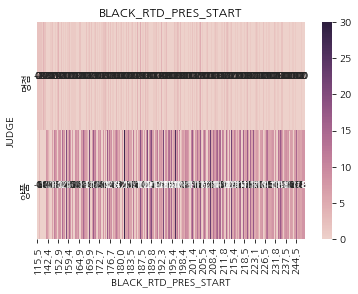

교차표(빈도) =>
BLACK_RTD_PRES_START  115.5  115.9  117.9  125.1  125.4  126.3  129.3  131.0  \
JUDGE                                                                          
명점                        0      0      2      0      2      4      2      1   
양품                        8      9      0      1      0      0      3      0   

BLACK_RTD_PRES_START  132.9  136.0  ...  248.3  248.5  249.2  250.4  251.5  \
JUDGE                               ...                                      
명점                        2      3  ...      0      2      0      1      1   
양품                        0      6  ...      7      1      6      0      6   

BLACK_RTD_PRES_START  253.1  256.9  259.4  272.7  281.5  
JUDGE                                                    
명점                        2      0      0      0      0  
양품                        6      8      8      8      8  

[2 rows x 543 columns]

교차표(확률) =>
BLACK_RTD_PRES_START  115.5  115.9  117.9  125.1  125.4  126.3  129.3  131.0  \
JUDGE  

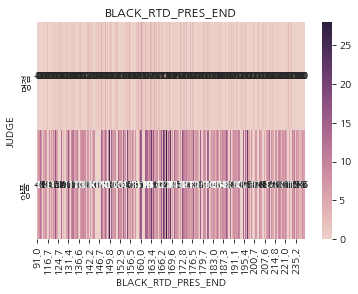

교차표(빈도) =>
BLACK_RTD_PRES_END  91.0   92.5   96.4   98.9   99.3   102.8  103.0  104.3  \
JUDGE                                                                        
명점                      0      1      0      0      0      0      0      0   
양품                      6      8      4      1      7      9      8      9   

BLACK_RTD_PRES_END  106.0  107.9  ...  249.9  251.6  263.0  264.8  265.3  \
JUDGE                             ...                                      
명점                      0      1  ...      0      0      0      0      0   
양품                     13      6  ...      8      4      4      8      4   

BLACK_RTD_PRES_END  267.7  271.7  272.5  272.7  273.9  
JUDGE                                                  
명점                      0      0      0      0      0  
양품                      5      8      3      6      6  

[2 rows x 570 columns]

교차표(확률) =>
BLACK_RTD_PRES_END  91.0      92.5   96.4   98.9   99.3   102.8  103.0  104.3  \
JUDGE                         

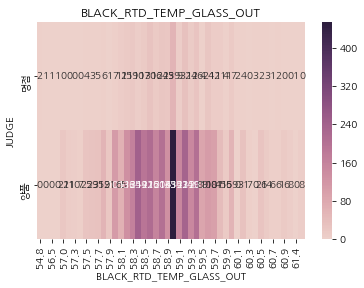

교차표(빈도) =>
BLACK_RTD_TEMP_GLASS_OUT  54.8  56.0  56.5  56.8  57.0  57.2  57.3  57.4  \
JUDGE                                                                      
명점                           2     1     1     1     0     0     0     0   
양품                           0     0     0     0    22    11    10     7   

BLACK_RTD_TEMP_GLASS_OUT  57.5  57.6  ...  60.3  60.4  60.5  60.6  60.7  60.8  \
JUDGE                                 ...                                       
명점                           4     3  ...     0     3     2     3     1     2   
양품                          25    29  ...     7     0    26    14     6     6   

BLACK_RTD_TEMP_GLASS_OUT  60.9  61.2  61.4  61.7  
JUDGE                                             
명점                           0     0     1     0  
양품                          16     8     0     8  

[2 rows x 46 columns]

교차표(확률) =>
BLACK_RTD_TEMP_GLASS_OUT  54.8  56.0  56.5  56.8  57.0  57.2  57.3  57.4  \
JUDGE                                       

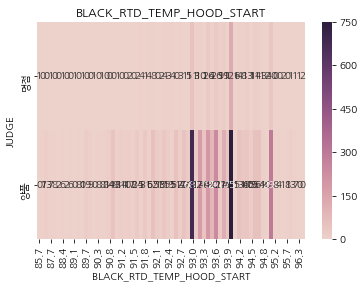

교차표(빈도) =>
BLACK_RTD_TEMP_HOOD_START  85.7  85.8  86.8  87.7  87.8  88.3  88.4  88.5  \
JUDGE                                                                       
명점                            1     0     0     1     0     0     1     0   
양품                            0     7    13     7     8     2     6     2   

BLACK_RTD_TEMP_HOOD_START  88.8  89.1  ...  94.9  95.0  95.2  95.3  95.4  \
JUDGE                                  ...                                 
명점                            0     1  ...     2    40     0     0     2   
양품                            6     0  ...     0   297     8     4     1   

BLACK_RTD_TEMP_HOOD_START  95.7  95.8  96.0  96.3  96.8  
JUDGE                                                    
명점                            0     1     1     1     2  
양품                            8    13     7     0     0  

[2 rows x 68 columns]

교차표(확률) =>
BLACK_RTD_TEMP_HOOD_START  85.7  85.8  86.8   87.7  87.8  88.3      88.4  \
JUDGE                           

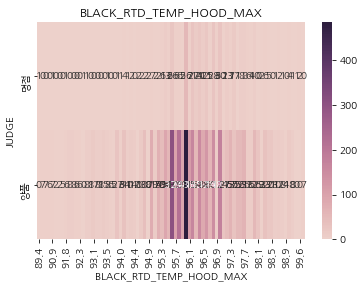

교차표(빈도) =>
BLACK_RTD_TEMP_HOOD_MAX  89.4   89.8   90.5   90.8   90.9   91.3   91.5   \
JUDGE                                                                      
명점                           1      0      0      0      1      0      0   
양품                           0      7      7      6      7      2      2   

BLACK_RTD_TEMP_HOOD_MAX  91.7   91.8   91.9   ...  98.5   98.6   98.7   98.8   \
JUDGE                                         ...                               
명점                           0      1      0  ...      0      1      2      1   
양품                           5      6      8  ...     23     10     12      8   

BLACK_RTD_TEMP_HOOD_MAX  98.9   99.0   99.2   99.5   99.6   100.0  
JUDGE                                                              
명점                           0      4      1      1      2      0  
양품                           4     18      8      0      0      7  

[2 rows x 78 columns]

교차표(확률) =>
BLACK_RTD_TEMP_HOOD_MAX  89.4   89.8   90.5   90.8  

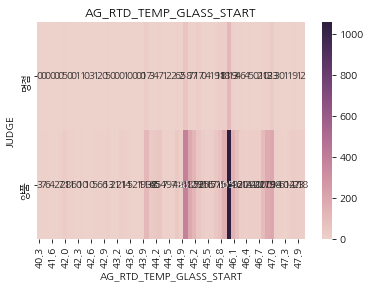

교차표(빈도) =>
AG_RTD_TEMP_GLASS_START  40.3  40.4  41.0  41.6  41.8  41.9  42.0  42.1  42.2  \
JUDGE                                                                           
명점                          0     0     0     0     0     0     5     0     0   
양품                          3     7     6     4     2     7    28    11     6   

AG_RTD_TEMP_GLASS_START  42.3  ...  46.8  46.9  47.0  47.1  47.2  47.3  47.5  \
JUDGE                          ...                                             
명점                          1  ...    10    12    33     3     0     1     1   
양품                          0  ...   100   179   198    14     6     0    14   

AG_RTD_TEMP_GLASS_START  47.8  47.9  48.0  
JUDGE                                      
명점                          9     1     2  
양품                         27    23    18  

[2 rows x 62 columns]

교차표(확률) =>
AG_RTD_TEMP_GLASS_START  40.3  40.4  41.0  41.6  41.8  41.9      42.0  42.1  \
JUDGE                                                

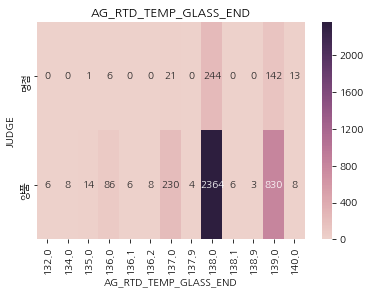

교차표(빈도) =>
AG_RTD_TEMP_GLASS_END  132.0  134.0  135.0  136.0  136.1  136.2  137.0  137.9  \
JUDGE                                                                           
명점                         0      0      1      6      0      0     21      0   
양품                         6      8     14     86      6      8    230      4   

AG_RTD_TEMP_GLASS_END  138.0  138.1  138.9  139.0  140.0  
JUDGE                                                     
명점                       244      0      0    142     13  
양품                      2364      6      3    830      8  

교차표(확률) =>
AG_RTD_TEMP_GLASS_END  132.0  134.0     135.0     136.0  136.1  136.2  \
JUDGE                                                                   
명점                       0.0    0.0  0.066667  0.065217    0.0    0.0   
양품                       1.0    1.0  0.933333  0.934783    1.0    1.0   

AG_RTD_TEMP_GLASS_END     137.0  137.9     138.0  138.1  138.9     139.0  \
JUDGE                                          

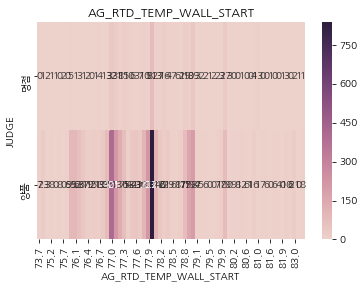

교차표(빈도) =>
AG_RTD_TEMP_WALL_START  73.7  75.0  75.1  75.2  75.4  75.6  75.7  75.9  76.0  \
JUDGE                                                                          
명점                         0     1     2     1     1     0     2     0     5   
양품                         7    23     3     8     0     8     0     6    95   

AG_RTD_TEMP_WALL_START  76.1  ...  81.4  81.6  81.7  81.8  81.9  82.0  82.5  \
JUDGE                         ...                                             
명점                         1  ...     0     1     0     0     1     3     0   
양품                        92  ...     6     0     6     4     0    10     6   

AG_RTD_TEMP_WALL_START  83.0  83.4  83.8  
JUDGE                                     
명점                         2     1     1  
양품                        21     0     8  

[2 rows x 66 columns]

교차표(확률) =>
AG_RTD_TEMP_WALL_START  73.7      75.0  75.1      75.2  75.4  75.6  75.7  \
JUDGE                                                               

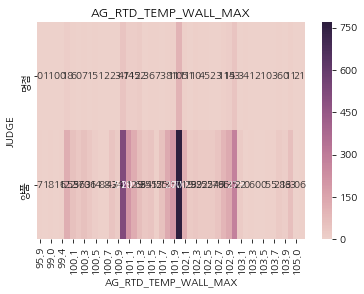

교차표(빈도) =>
AG_RTD_TEMP_WALL_MAX  95.9   98.0   99.0   99.3   99.4   100.0  100.1  100.2  \
JUDGE                                                                          
명점                        0      1      1      0      0     18      6      0   
양품                        7      1      8      1      6    122     55     37   

AG_RTD_TEMP_WALL_MAX  100.3  100.4  ...  103.3  103.4  103.5  103.6  103.7  \
JUDGE                               ...                                      
명점                        7      1  ...      1      2      1      0      3   
양품                       60     36  ...      6      0      0      5      5   

AG_RTD_TEMP_WALL_MAX  103.8  103.9  104.0  105.0  108.8  
JUDGE                                                    
명점                        6      0     11      2      1  
양품                       28     13     63      0      6  

[2 rows x 48 columns]

교차표(확률) =>
AG_RTD_TEMP_WALL_MAX  95.9   98.0      99.0   99.3   99.4      100.0  \
JUDGE           

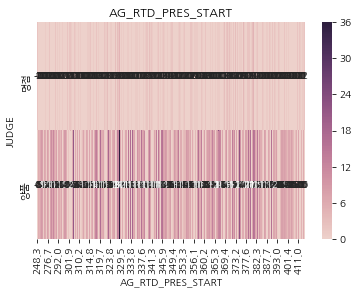

교차표(빈도) =>
AG_RTD_PRES_START  248.3  256.0  259.6  260.4  263.0  264.6  267.0  267.5  \
JUDGE                                                                       
명점                     1      1      2      0      0      1      0      0   
양품                     6      0      0      8      6      8      5      6   

AG_RTD_PRES_START  268.3  269.0  ...  415.0  416.0  416.4  417.0  417.9  \
JUDGE                            ...                                      
명점                     0      1  ...      0      1      2      0      0   
양품                     7      0  ...      2      0      7      5      7   

AG_RTD_PRES_START  418.2  419.7  421.7  422.8  423.8  
JUDGE                                                 
명점                     2      1      2      1      2  
양품                     0      0      0      6      0  

[2 rows x 590 columns]

교차표(확률) =>
AG_RTD_PRES_START     248.3  256.0  259.6  260.4  263.0     264.6  267.0  \
JUDGE                                          

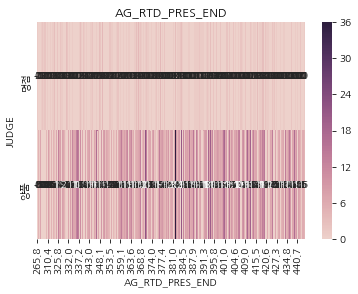

교차표(빈도) =>
AG_RTD_PRES_END  265.8  283.0  285.0  286.9  287.1  287.6  288.0  288.5  \
JUDGE                                                                     
명점                   2      0      1      0      0      1      0      1   
양품                   0      8      0      6      5      6      1      0   

AG_RTD_PRES_END  290.0  292.9  ...  445.2  445.5  446.5  447.2  448.0  449.5  \
JUDGE                          ...                                             
명점                   0      1  ...      1      2      0      0      0      0   
양품                   7      0  ...      0      5      8      8      1      5   

AG_RTD_PRES_END  452.9  454.1  455.0  456.7  
JUDGE                                        
명점                   0      0      0      1  
양품                   6     10      6      5  

[2 rows x 566 columns]

교차표(확률) =>
AG_RTD_PRES_END  265.8  283.0  285.0  286.9  287.1     287.6  288.0  288.5  \
JUDGE                                                                

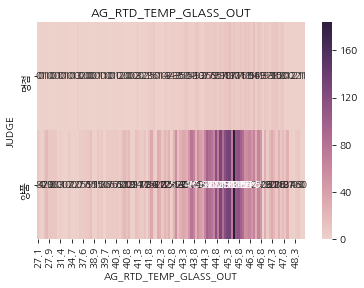

교차표(빈도) =>
AG_RTD_TEMP_GLASS_OUT  27.1  27.3  27.4  27.5  27.8  27.9  28.2  28.5  28.6  \
JUDGE                                                                         
명점                        0     0     1     1     1     0     0     0     0   
양품                        8     4     0     7    20     9     8     8     8   

AG_RTD_TEMP_GLASS_OUT  30.7  ...  47.8  47.9  48.0  48.1  48.2  48.3  48.5  \
JUDGE                        ...                                             
명점                        1  ...     8     0     1     0     2     2     2   
양품                        0  ...    18     9    27     1     4     0     6   

AG_RTD_TEMP_GLASS_OUT  48.7  50.3  50.4  
JUDGE                                    
명점                        1     1     1  
양품                        9     0     0  

[2 rows x 120 columns]

교차표(확률) =>
AG_RTD_TEMP_GLASS_OUT  27.1  27.3  27.4   27.5      27.8  27.9  28.2  28.5  \
JUDGE                                                                        

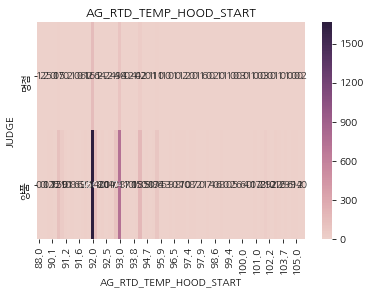

교차표(빈도) =>
AG_RTD_TEMP_HOOD_START  88.0   89.0   89.2   90.0   90.1   90.9   91.0   \
JUDGE                                                                     
명점                          1      2      2      5      0      0     17   
양품                          0      0      0     12      7      6    129   

AG_RTD_TEMP_HOOD_START  91.1   91.2   91.3   ...  102.9  103.0  103.5  103.7  \
JUDGE                                        ...                               
명점                          5      0      2  ...      0      1      1      0   
양품                         50     10      1  ...      2     22     12      6   

AG_RTD_TEMP_HOOD_START  104.0  104.1  104.7  105.0  105.1  106.0  
JUDGE                                                             
명점                          1      0      0      0      0      2  
양품                          9      6      9     14      2      0  

[2 rows x 79 columns]

교차표(확률) =>
AG_RTD_TEMP_HOOD_START  88.0   89.0   89.2      90.0   90.1   90

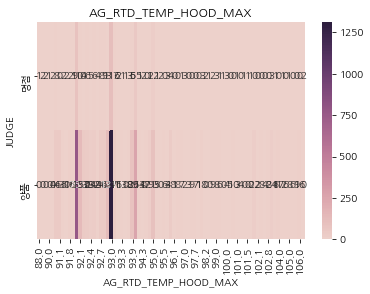

교차표(빈도) =>
AG_RTD_TEMP_HOOD_MAX  88.0   89.0   89.2   90.0   90.8   91.0   91.1   91.2   \
JUDGE                                                                          
명점                        1      2      2      1      2      8      0      2   
양품                        0      0      0      0      0     46     43      6   

AG_RTD_TEMP_HOOD_MAX  91.3   91.8   ...  103.0  103.3  104.0  104.5  104.6  \
JUDGE                               ...                                      
명점                        2      2  ...      3      1      0      1      0   
양품                        0     16  ...     24      6     17     12      6   

AG_RTD_TEMP_HOOD_MAX  105.0  105.1  105.7  106.0  107.0  
JUDGE                                                    
명점                        1      0      0      0      2  
양품                        8      6      9     16      0  

[2 rows x 77 columns]

교차표(확률) =>
AG_RTD_TEMP_HOOD_MAX  88.0   89.0   89.2   90.0   90.8      91.0   91.1   \
JUDGE       

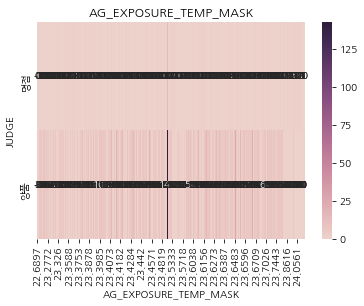

교차표(빈도) =>
AG_EXPOSURE_TEMP_MASK  22.6897  22.7835  22.8809  22.8986  22.9422  22.9750  \
JUDGE                                                                         
명점                           0        0        0        1        1        2   
양품                           8        3        3        0        0        0   

AG_EXPOSURE_TEMP_MASK  23.0938  23.1396  23.2000  23.2127  ...  24.1758  \
JUDGE                                                      ...            
명점                           1        0        1        0  ...        2   
양품                           0        7        6        7  ...        0   

AG_EXPOSURE_TEMP_MASK  24.1772  24.1813  24.2000  24.2137  24.2324  24.2380  \
JUDGE                                                                         
명점                           1        1        1        1        1        1   
양품                           0        0        0        0        0        0   

AG_EXPOSURE_TEMP_MASK  24.2418  24.2522  24.2595  
JUD

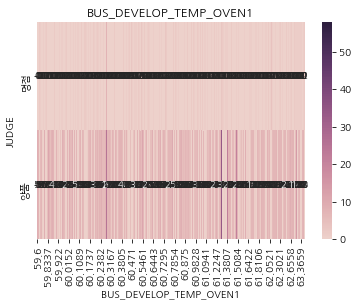

교차표(빈도) =>
BUS_DEVELOP_TEMP_OVEN1  59.6000  59.6135  59.6198  59.6489  59.6833  59.6890  \
JUDGE                                                                          
명점                            1        0        0        1        0        0   
양품                            0        5        9        6        5        8   

BUS_DEVELOP_TEMP_OVEN1  59.6989  59.7000  59.7054  59.7233  ...  63.3214  \
JUDGE                                                       ...            
명점                            0        2        0        1  ...        1   
양품                            8        0        2        6  ...        0   

BUS_DEVELOP_TEMP_OVEN1  63.3659  63.4000  63.4109  63.5309  63.5311  63.5872  \
JUDGE                                                                          
명점                            2        1        1        1        0        0   
양품                            0        0        0        0        7        8   

BUS_DEVELOP_TEMP_OVEN1  63.9654  64.0699  

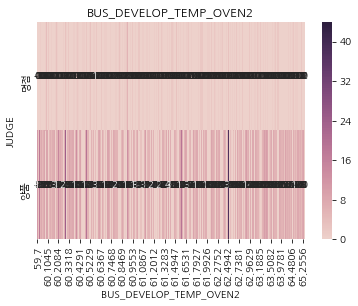

교차표(빈도) =>
BUS_DEVELOP_TEMP_OVEN2  59.7000  59.8814  59.9000  59.9593  59.9611  59.9889  \
JUDGE                                                                          
명점                            0        0        0        1        1        0   
양품                            8        7       11        7        7        3   

BUS_DEVELOP_TEMP_OVEN2  59.9989  60.0000  60.0074  60.0165  ...  65.1360  \
JUDGE                                                       ...            
명점                            1        0        0        0  ...        0   
양품                            0       18        7        8  ...        7   

BUS_DEVELOP_TEMP_OVEN2  65.1596  65.2000  65.2292  65.2556  65.3559  65.3750  \
JUDGE                                                                          
명점                            0        2        0        1        0        1   
양품                            8        5        8        0        8        7   

BUS_DEVELOP_TEMP_OVEN2  65.5137  65.6937  

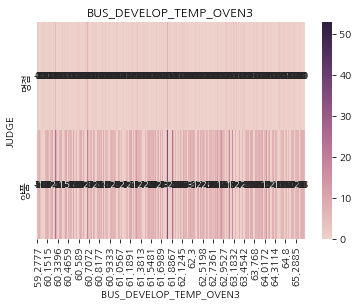

교차표(빈도) =>
BUS_DEVELOP_TEMP_OVEN3  59.2777  59.5036  59.5318  59.7628  59.7697  59.7811  \
JUDGE                                                                          
명점                            1        0        2        1        0        1   
양품                            7        8        5        0        6        6   

BUS_DEVELOP_TEMP_OVEN3  59.8000  59.8528  59.8784  59.8878  ...  65.9075  \
JUDGE                                                       ...            
명점                            0        0        0        0  ...        1   
양품                            5        8        6        6  ...        6   

BUS_DEVELOP_TEMP_OVEN3  66.0678  66.1814  66.2870  66.5329  66.5865  66.7161  \
JUDGE                                                                          
명점                            0        0        0        0        0        0   
양품                            5        8        7        1        8        9   

BUS_DEVELOP_TEMP_OVEN3  66.9000  66.9063  

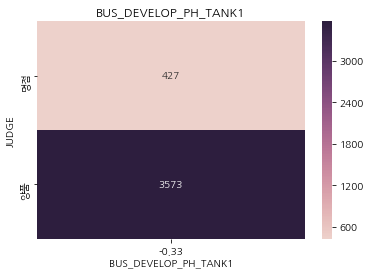

교차표(빈도) =>
BUS_DEVELOP_PH_TANK1  -0.33
JUDGE                      
명점                      427
양품                     3573

교차표(확률) =>
BUS_DEVELOP_PH_TANK1    -0.33
JUDGE                        
명점                    0.10675
양품                    0.89325
카이제곱 통계량 =>
Chi2: 1714.678, p-value: 0.000


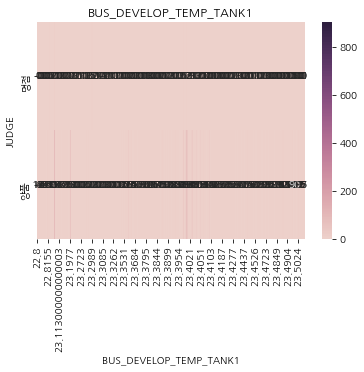

교차표(빈도) =>
BUS_DEVELOP_TEMP_TANK1  22.8000  22.8013  22.8024  22.8034  22.8035  22.8037  \
JUDGE                                                                          
명점                            1        0        0        0        0        0   
양품                           17        6       12        8        4        6   

BUS_DEVELOP_TEMP_TANK1  22.8047  22.8058  22.8059  22.8071  ...  23.5024  \
JUDGE                                                       ...            
명점                            0        0        1        0  ...        0   
양품                            6        4        6        2  ...        9   

BUS_DEVELOP_TEMP_TANK1  23.5033  23.5034  23.5035  23.5046  23.5047  23.5059  \
JUDGE                                                                          
명점                            0        0        0        0        0        0   
양품                           11        7        7        6        9        6   

BUS_DEVELOP_TEMP_TANK1  23.5080  23.5082  

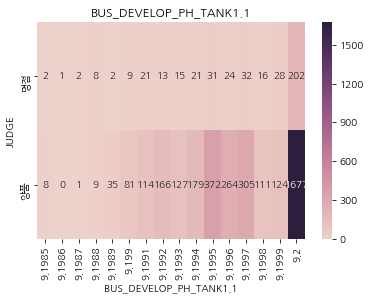

교차표(빈도) =>
BUS_DEVELOP_PH_TANK1.1  9.1985  9.1986  9.1987  9.1988  9.1989  9.1990  \
JUDGE                                                                    
명점                           2       1       2       8       2       9   
양품                           8       0       1       9      35      81   

BUS_DEVELOP_PH_TANK1.1  9.1991  9.1992  9.1993  9.1994  9.1995  9.1996  \
JUDGE                                                                    
명점                          21      13      15      21      31      24   
양품                         114     166     127     179     372     264   

BUS_DEVELOP_PH_TANK1.1  9.1997  9.1998  9.1999  9.2000  
JUDGE                                                   
명점                          32      16      28     202  
양품                         305     111     124    1677  

교차표(확률) =>
BUS_DEVELOP_PH_TANK1.1  9.1985  9.1986    9.1987    9.1988    9.1989  9.1990  \
JUDGE                                                                      

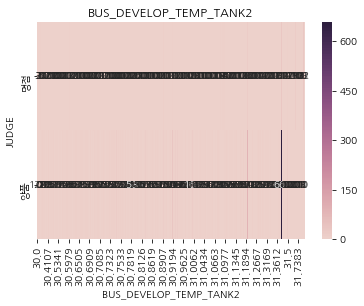

교차표(빈도) =>
BUS_DEVELOP_TEMP_TANK2  30.0000  30.1548  30.1833  30.2000  30.2322  30.3000  \
JUDGE                                                                          
명점                            3        2        2        1        0        5   
양품                          128        0        0        0        2        1   

BUS_DEVELOP_TEMP_TANK2  30.3379  30.3469  30.3485  30.3515  ...  31.7383  \
JUDGE                                                       ...            
명점                            0        0        1        0  ...        0   
양품                            1        7        8        4  ...        1   

BUS_DEVELOP_TEMP_TANK2  31.7646  31.7773  31.7787  31.7882  31.8386  31.9000  \
JUDGE                                                                          
명점                            0        1        0        1        1       23   
양품                            1        0        1        1        0        3   

BUS_DEVELOP_TEMP_TANK2  31.9326  32.0000  

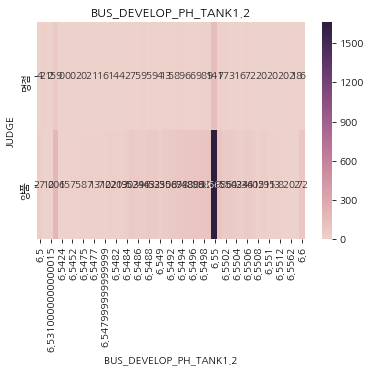

교차표(빈도) =>
BUS_DEVELOP_PH_TANK1.2  6.5000  6.5300  6.5310  6.5400  6.5424  6.5430  \
JUDGE                                                                    
명점                           4      21       2      59       0       0   
양품                          27       1       0     201       6       5   

BUS_DEVELOP_PH_TANK1.2  6.5452  6.5469  6.5475  6.5476  ...  6.5507  6.5508  \
JUDGE                                                   ...                   
명점                           0       2       0       2  ...       2       2   
양품                           7       5       8       7  ...      40      15   

BUS_DEVELOP_PH_TANK1.2  6.5509  6.5510  6.5511  6.5512  6.5520  6.5562  \
JUDGE                                                                    
명점                           0       2       0       2       0       2   
양품                          29      15      13       8       2       0   

BUS_DEVELOP_PH_TANK1.2  6.5600  6.6000  
JUDGE                                

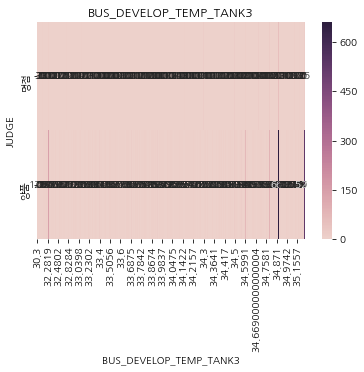

교차표(빈도) =>
BUS_DEVELOP_TEMP_TANK3  30.3000  31.0786  31.2553  31.4069  31.5000  31.5728  \
JUDGE                                                                          
명점                            3        2        1        2        0        1   
양품                          128        0        0        0        1        8   

BUS_DEVELOP_TEMP_TANK3  31.8011  31.9044  31.9053  31.9143  ...  35.1670  \
JUDGE                                                       ...            
명점                            0        0        0        3  ...        2   
양품                            1        2        9        0  ...        0   

BUS_DEVELOP_TEMP_TANK3  35.1723  35.2041  35.2344  35.2354  35.2540  35.2717  \
JUDGE                                                                          
명점                            0        3        2        0        2        0   
양품                            9        6        0        7        6        9   

BUS_DEVELOP_TEMP_TANK3  35.2918  35.2979  

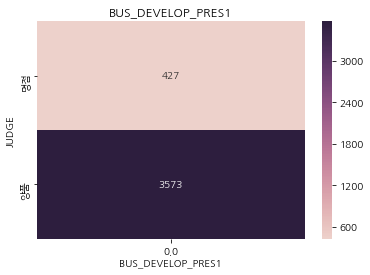

교차표(빈도) =>
BUS_DEVELOP_PRES1   0.0
JUDGE                  
명점                  427
양품                 3573

교차표(확률) =>
BUS_DEVELOP_PRES1      0.0
JUDGE                     
명점                 0.10675
양품                 0.89325
카이제곱 통계량 =>
Chi2: 444.194, p-value: 0.000


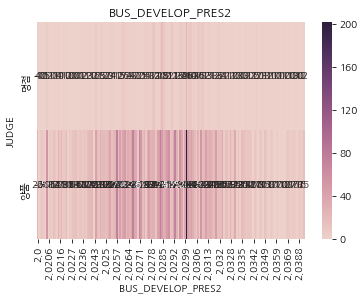

교차표(빈도) =>
BUS_DEVELOP_PRES2  2.0000  2.0185  2.0186  2.0194  2.0195  2.0196  2.0200  \
JUDGE                                                                       
명점                      4       0       0       0       0       1       5   
양품                     26       2       7       9       6       0      55   

BUS_DEVELOP_PRES2  2.0206  2.0208  2.0209  ...  2.0370  2.0374  2.0376  \
JUDGE                                      ...                           
명점                      2       1       0  ...       1       0       0   
양품                      1       8       6  ...       8       1       7   

BUS_DEVELOP_PRES2  2.0382  2.0383  2.0385  2.0388  2.0390  2.0398  2.0400  
JUDGE                                                                      
명점                      0       3       1       0       0       0       2  
양품                      7       6       1       8       7       6      15  

[2 rows x 165 columns]

교차표(확률) =>
BUS_DEVELOP_PRES2    2.0000  2.0185  2.0186

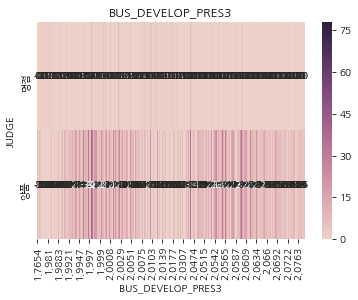

교차표(빈도) =>
BUS_DEVELOP_PRES3  1.7654  1.8157  1.8495  1.8504  1.8582  1.8941  1.9654  \
JUDGE                                                                       
명점                      0       0       0       0       0       0       2   
양품                      8       7       7       1       9       7       5   

BUS_DEVELOP_PRES3  1.9753  1.9764  1.9766  ...  2.0773  2.0795  2.0801  \
JUDGE                                      ...                           
명점                      1       2       0  ...       1       0       0   
양품                      0       0       6  ...       6       7       7   

BUS_DEVELOP_PRES3  2.0835  2.0838  2.1000  2.1700  2.2082  2.2437  2.2944  
JUDGE                                                                      
명점                      0       0       1       0       1       0       0  
양품                      6      14       8       3       4       6       6  

[2 rows x 462 columns]

교차표(확률) =>
BUS_DEVELOP_PRES3  1.7654  1.8157  1.8495  

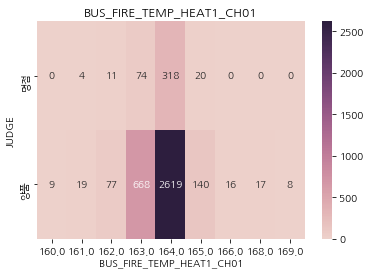

교차표(빈도) =>
BUS_FIRE_TEMP_HEAT1_CH01  160.0  161.0  162.0  163.0  164.0  165.0  166.0  \
JUDGE                                                                       
명점                            0      4     11     74    318     20      0   
양품                            9     19     77    668   2619    140     16   

BUS_FIRE_TEMP_HEAT1_CH01  168.0  169.0  
JUDGE                                   
명점                            0      0  
양품                           17      8  

교차표(확률) =>
BUS_FIRE_TEMP_HEAT1_CH01  160.0     161.0  162.0    163.0     164.0  165.0  \
JUDGE                                                                        
명점                          0.0  0.173913  0.125  0.09973  0.108274  0.125   
양품                          1.0  0.826087  0.875  0.90027  0.891726  0.875   

BUS_FIRE_TEMP_HEAT1_CH01  166.0  168.0  169.0  
JUDGE                                          
명점                          0.0    0.0    0.0  
양품                          1.0    1.0    1.0  

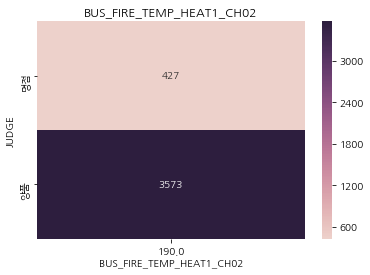

교차표(빈도) =>
BUS_FIRE_TEMP_HEAT1_CH02  190.0
JUDGE                          
명점                          427
양품                         3573

교차표(확률) =>
BUS_FIRE_TEMP_HEAT1_CH02    190.0
JUDGE                            
명점                        0.10675
양품                        0.89325
카이제곱 통계량 =>
Chi2: 18.916, p-value: 0.002


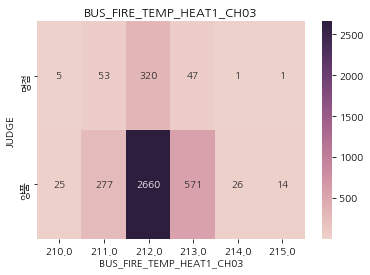

교차표(빈도) =>
BUS_FIRE_TEMP_HEAT1_CH03  210.0  211.0  212.0  213.0  214.0  215.0
JUDGE                                                             
명점                            5     53    320     47      1      1
양품                           25    277   2660    571     26     14

교차표(확률) =>
BUS_FIRE_TEMP_HEAT1_CH03     210.0     211.0     212.0     213.0     214.0  \
JUDGE                                                                        
명점                        0.166667  0.160606  0.107383  0.076052  0.037037   
양품                        0.833333  0.839394  0.892617  0.923948  0.962963   

BUS_FIRE_TEMP_HEAT1_CH03     215.0  
JUDGE                               
명점                        0.066667  
양품                        0.933333  
카이제곱 통계량 =>
Chi2: 2.785, p-value: 0.248


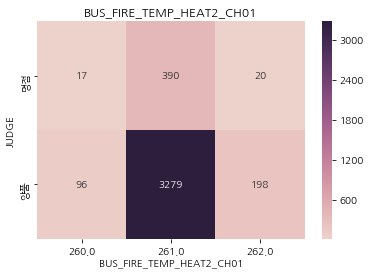

교차표(빈도) =>
BUS_FIRE_TEMP_HEAT2_CH01  260.0  261.0  262.0
JUDGE                                        
명점                           17    390     20
양품                           96   3279    198

교차표(확률) =>
BUS_FIRE_TEMP_HEAT2_CH01     260.0     261.0     262.0
JUDGE                                                 
명점                        0.150442  0.106296  0.091743
양품                        0.849558  0.893704  0.908257
카이제곱 통계량 =>
Chi2: 15.447, p-value: 0.004


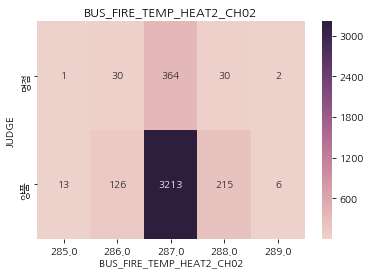

교차표(빈도) =>
BUS_FIRE_TEMP_HEAT2_CH02  285.0  286.0  287.0  288.0  289.0
JUDGE                                                      
명점                            1     30    364     30      2
양품                           13    126   3213    215      6

교차표(확률) =>
BUS_FIRE_TEMP_HEAT2_CH02     285.0     286.0     287.0     288.0  289.0
JUDGE                                                                  
명점                        0.071429  0.192308  0.101761  0.122449   0.25
양품                        0.928571  0.807692  0.898239  0.877551   0.75
카이제곱 통계량 =>
Chi2: 7.686, p-value: 0.104


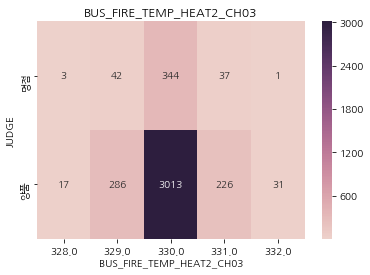

교차표(빈도) =>
BUS_FIRE_TEMP_HEAT2_CH03  328.0  329.0  330.0  331.0  332.0
JUDGE                                                      
명점                            3     42    344     37      1
양품                           17    286   3013    226     31

교차표(확률) =>
BUS_FIRE_TEMP_HEAT2_CH03  328.0     329.0     330.0     331.0    332.0
JUDGE                                                                 
명점                         0.15  0.128049  0.102472  0.140684  0.03125
양품                         0.85  0.871951  0.897528  0.859316  0.96875
카이제곱 통계량 =>
Chi2: 186.180, p-value: 0.000


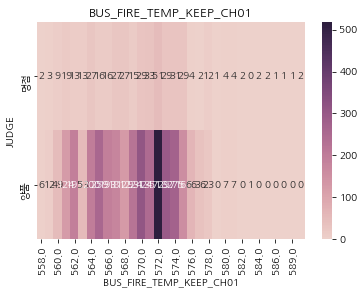

교차표(빈도) =>
BUS_FIRE_TEMP_KEEP_CH01  558.0  559.0  560.0  561.0  562.0  563.0  564.0  \
JUDGE                                                                      
명점                           2      3      9     19     13     13     27   
양품                           6     12     49    124    193     53    200   

BUS_FIRE_TEMP_KEEP_CH01  565.0  566.0  567.0  ...  580.0  581.0  582.0  583.0  \
JUDGE                                         ...                               
명점                          16     16     27  ...      4      4      2      0   
양품                         259    193    181  ...      7      7      0      1   

BUS_FIRE_TEMP_KEEP_CH01  584.0  585.0  586.0  588.0  589.0  592.0  
JUDGE                                                              
명점                           2      2      1      1      1      2  
양품                           0      0      0      0      0      0  

[2 rows x 32 columns]

교차표(확률) =>
BUS_FIRE_TEMP_KEEP_CH01  558.0  559.0     560.0     

KeyboardInterrupt: 

In [18]:
for i in range(96):
    fun_chi2(process, 'JUDGE', col_list[i+11], heatmap = True, print_crosstab = True)
    plt.show()
    print("===============================================================")


BLACK_RTD_TEMP_GLASS_START
분석 통계량 => 
statistic:(F) 1.510, p-value: 0.219


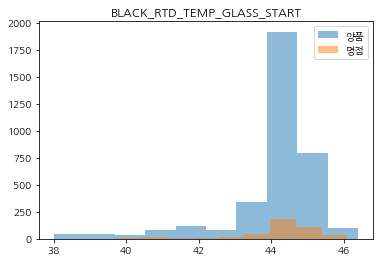

BLACK_RTD_TEMP_GLASS_END
분석 통계량 => 
statistic:(F) 1.459, p-value: 0.227


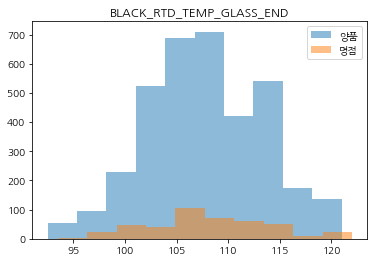

BLACK_RTD_TEMP_WALL_START
분석 통계량 => 
statistic:(F) 9.288, p-value: 0.002


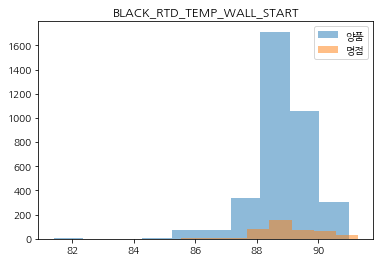

BLACK_RTD_TEMP_WALL_MAX
분석 통계량 => 
statistic:(F) 23.462, p-value: 0.000


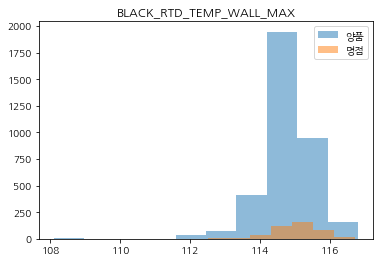

BLACK_RTD_PRES_START
분석 통계량 => 
statistic:(F) 32.897, p-value: 0.000


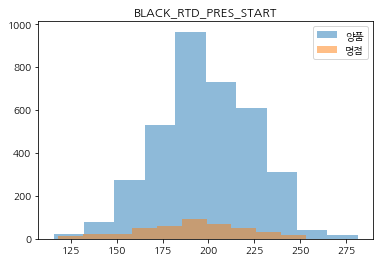

BLACK_RTD_PRES_END
분석 통계량 => 
statistic:(F) 1.141, p-value: 0.285


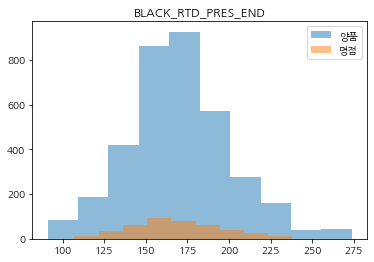

BLACK_RTD_TEMP_GLASS_OUT
분석 통계량 => 
statistic:(F) 5.444, p-value: 0.020


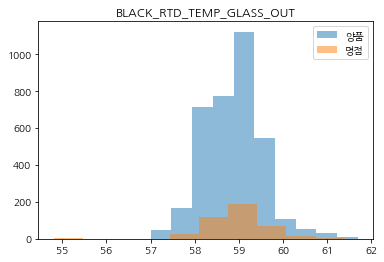

BLACK_RTD_TEMP_HOOD_START
분석 통계량 => 
statistic:(F) 26.416, p-value: 0.000


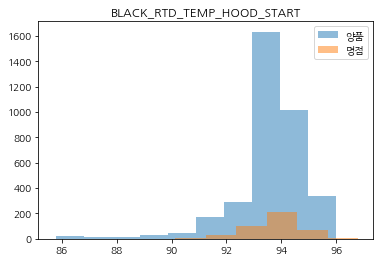

BLACK_RTD_TEMP_HOOD_MAX
분석 통계량 => 
statistic:(F) 28.982, p-value: 0.000


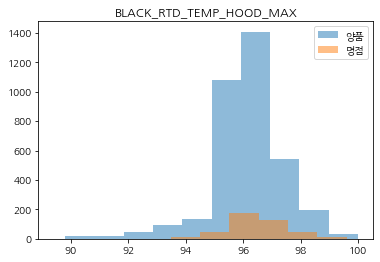

AG_RTD_TEMP_GLASS_START
분석 통계량 => 
statistic:(F) 0.061, p-value: 0.804


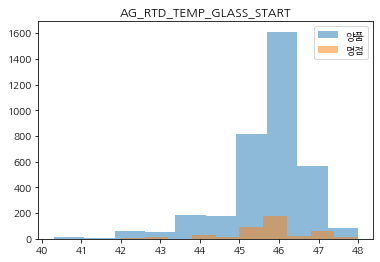

AG_RTD_TEMP_GLASS_END
분석 통계량 => 
statistic:(F) 35.201, p-value: 0.000


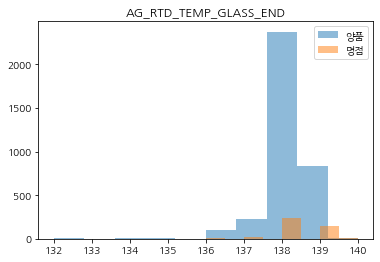

AG_RTD_TEMP_WALL_START
분석 통계량 => 
statistic:(F) 61.479, p-value: 0.000


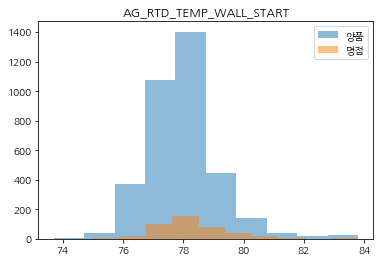

AG_RTD_TEMP_WALL_MAX
분석 통계량 => 
statistic:(F) 8.654, p-value: 0.003


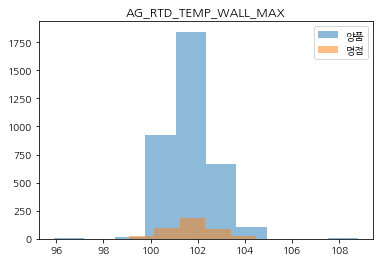

AG_RTD_PRES_START
분석 통계량 => 
statistic:(F) 3.796, p-value: 0.051


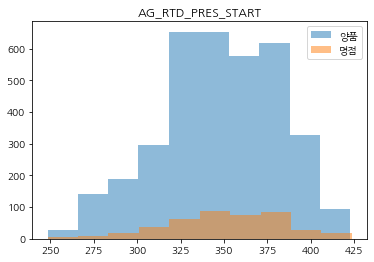

AG_RTD_PRES_END
분석 통계량 => 
statistic:(F) 47.759, p-value: 0.000


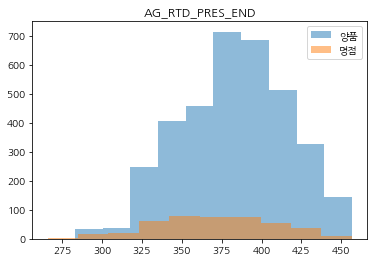

AG_RTD_TEMP_GLASS_OUT
분석 통계량 => 
statistic:(F) 9.870, p-value: 0.002


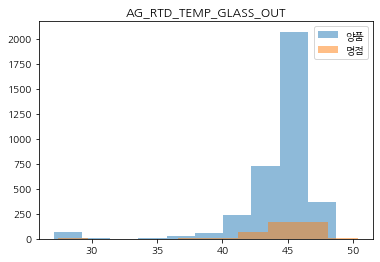

AG_RTD_TEMP_HOOD_START
분석 통계량 => 
statistic:(F) 0.069, p-value: 0.793


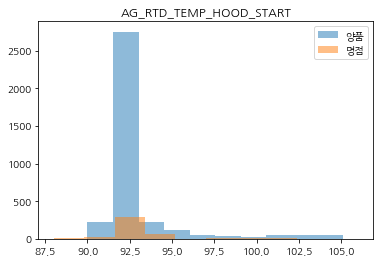

AG_RTD_TEMP_HOOD_MAX
분석 통계량 => 
statistic:(F) 0.000, p-value: 0.991


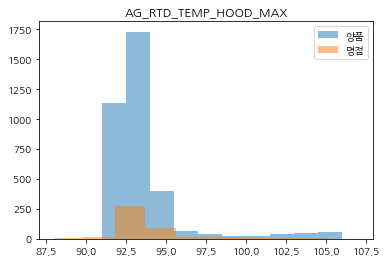

AG_EXPOSURE_TEMP_MASK
분석 통계량 => 
statistic:(F) 31.012, p-value: 0.000


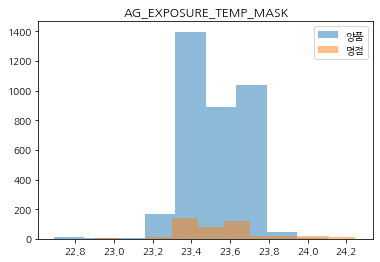

BUS_DEVELOP_TEMP_OVEN1
분석 통계량 => 
statistic:(F) 1.230, p-value: 0.267


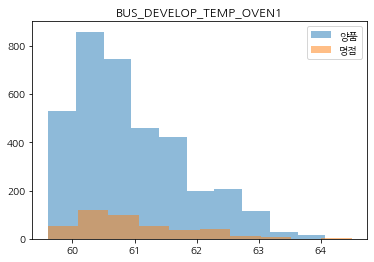

BUS_DEVELOP_TEMP_OVEN2
분석 통계량 => 
statistic:(F) 2.853, p-value: 0.091


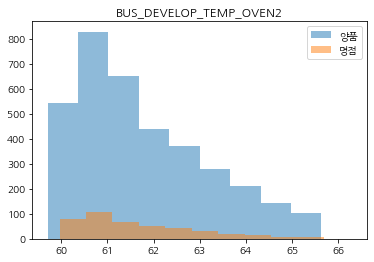

BUS_DEVELOP_TEMP_OVEN3
분석 통계량 => 
statistic:(F) 0.362, p-value: 0.548


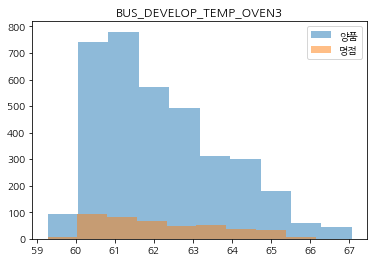

BUS_DEVELOP_PH_TANK1
분석 통계량 => 
statistic:(F) nan, p-value: nan


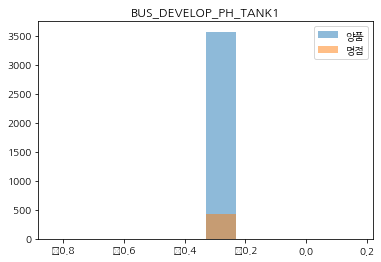

BUS_DEVELOP_TEMP_TANK1
분석 통계량 => 
statistic:(F) 22.208, p-value: 0.000


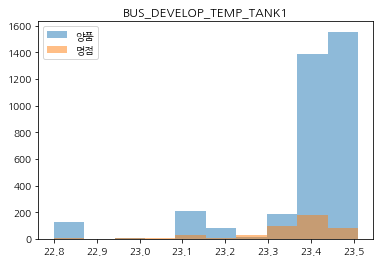

BUS_DEVELOP_PH_TANK1.1
분석 통계량 => 
statistic:(F) 0.097, p-value: 0.755


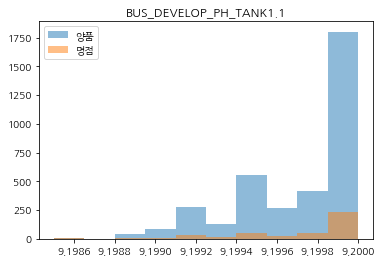

BUS_DEVELOP_TEMP_TANK2
분석 통계량 => 
statistic:(F) 171.876, p-value: 0.000


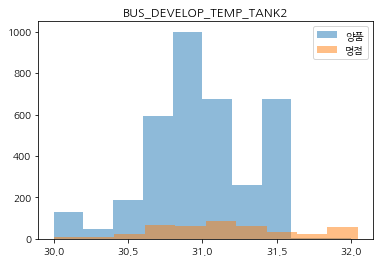

BUS_DEVELOP_PH_TANK1.2
분석 통계량 => 
statistic:(F) 17.083, p-value: 0.000


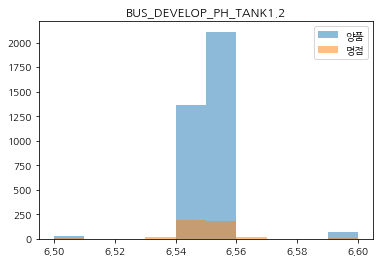

BUS_DEVELOP_TEMP_TANK3
분석 통계량 => 
statistic:(F) 1.442, p-value: 0.230


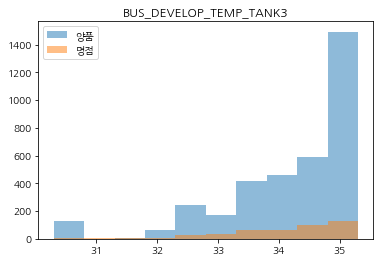

BUS_DEVELOP_PRES1
분석 통계량 => 
statistic:(F) nan, p-value: nan


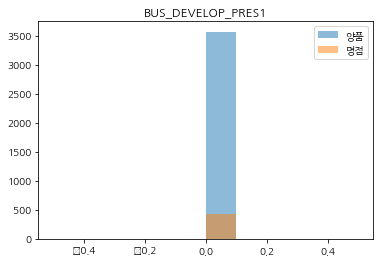

BUS_DEVELOP_PRES2
분석 통계량 => 
statistic:(F) 7.471, p-value: 0.006


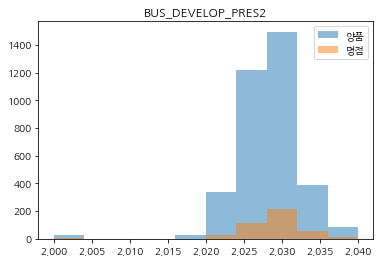

BUS_DEVELOP_PRES3
분석 통계량 => 
statistic:(F) 26.002, p-value: 0.000


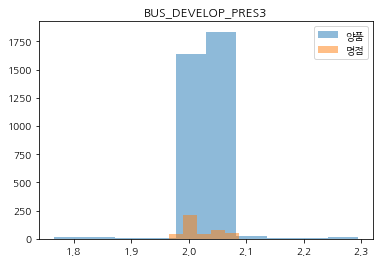

BUS_FIRE_TEMP_HEAT1_CH01
분석 통계량 => 
statistic:(F) 0.610, p-value: 0.435


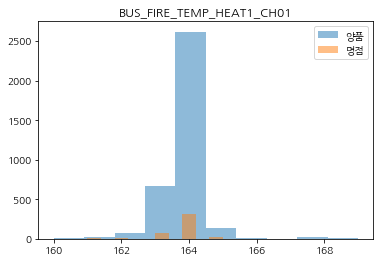

BUS_FIRE_TEMP_HEAT1_CH02
분석 통계량 => 
statistic:(F) nan, p-value: nan


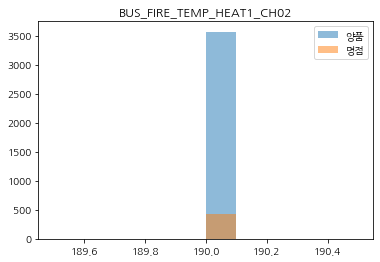

BUS_FIRE_TEMP_HEAT1_CH03
분석 통계량 => 
statistic:(F) 17.275, p-value: 0.000


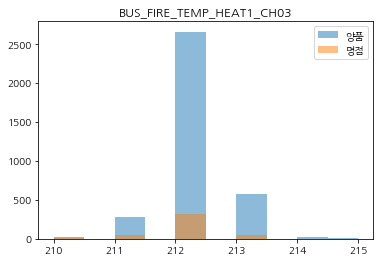

BUS_FIRE_TEMP_HEAT2_CH01
분석 통계량 => 
statistic:(F) 2.153, p-value: 0.142


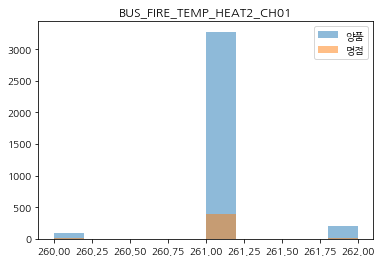

BUS_FIRE_TEMP_HEAT2_CH02
분석 통계량 => 
statistic:(F) 0.832, p-value: 0.362


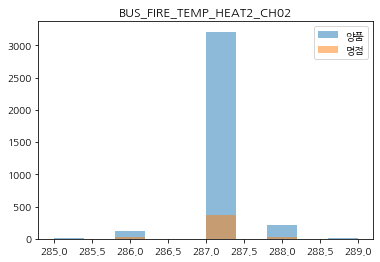

BUS_FIRE_TEMP_HEAT2_CH03
분석 통계량 => 
statistic:(F) 0.281, p-value: 0.596


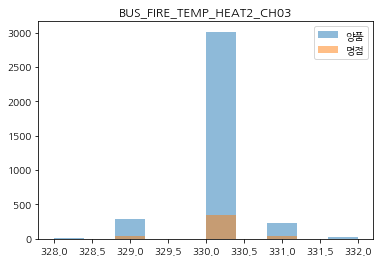

BUS_FIRE_TEMP_KEEP_CH01
분석 통계량 => 
statistic:(F) 7.947, p-value: 0.005


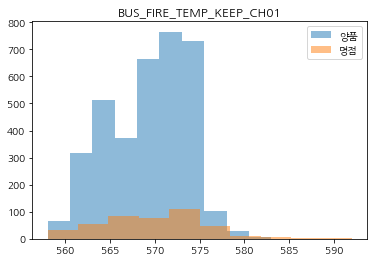

BUS_FIRE_TEMP_KEEP_CH02
분석 통계량 => 
statistic:(F) 22.507, p-value: 0.000


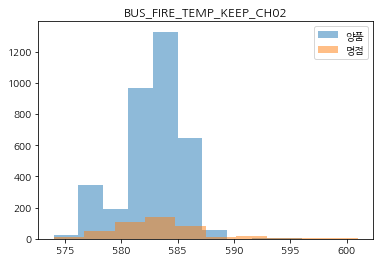

BUS_FIRE_TEMP_KEEP_CH03
분석 통계량 => 
statistic:(F) 8.219, p-value: 0.004


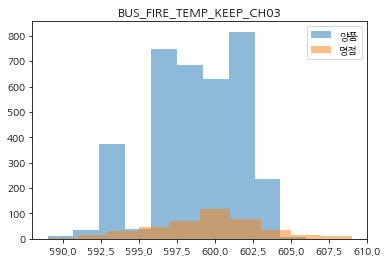

BUS_FIRE_TEMP_ANEAL_CH01
분석 통계량 => 
statistic:(F) 31.427, p-value: 0.000


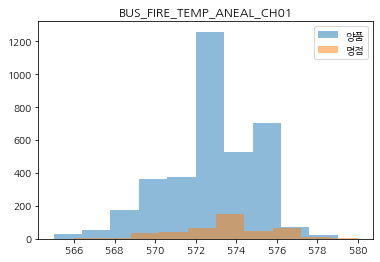

BUS_FIRE_TEMP_ANEAL_CH02
분석 통계량 => 
statistic:(F) 0.815, p-value: 0.367


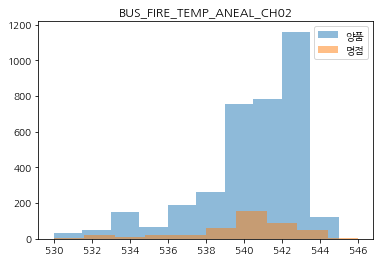

BUS_FIRE_TEMP_ANEAL_CH03
분석 통계량 => 
statistic:(F) 0.918, p-value: 0.338


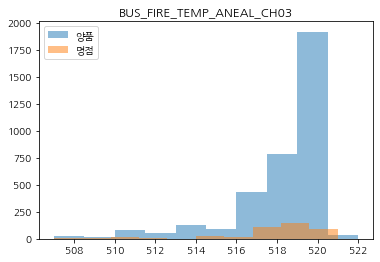

DIELEC_FIRE_TEMP_HEAT1_CH01
분석 통계량 => 
statistic:(F) 0.567, p-value: 0.451


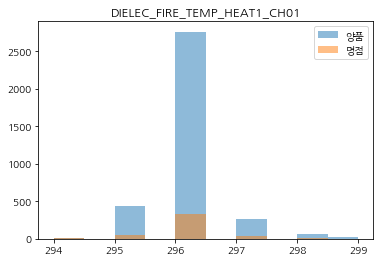

DIELEC_FIRE_TEMP_HEAT1_CH02
분석 통계량 => 
statistic:(F) 0.399, p-value: 0.528


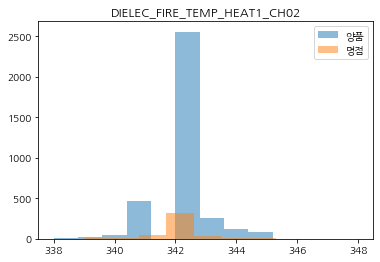

DIELEC_FIRE_TEMP_HEAT1_CH03
분석 통계량 => 
statistic:(F) 0.724, p-value: 0.395


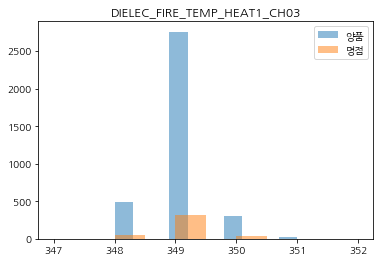

DIELEC_FIRE_TEMP_HEAT2_CH01
분석 통계량 => 
statistic:(F) 2.444, p-value: 0.118


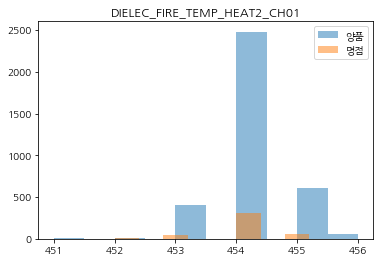

DIELEC_FIRE_TEMP_HEAT2_CH02
분석 통계량 => 
statistic:(F) 0.024, p-value: 0.876


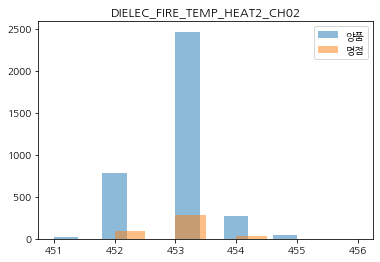

DIELEC_FIRE_TEMP_HEAT2_CH03
분석 통계량 => 
statistic:(F) 0.671, p-value: 0.413


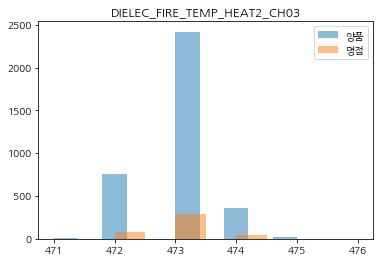

DIELEC_FIRE_TEMP_KEEP_CH01
분석 통계량 => 
statistic:(F) 4.812, p-value: 0.028


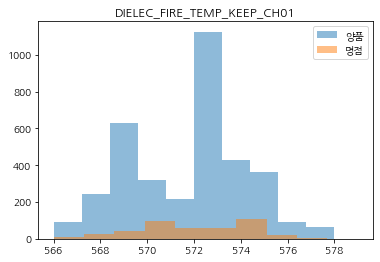

DIELEC_FIRE_TEMP_KEEP_CH02
분석 통계량 => 
statistic:(F) 0.041, p-value: 0.839


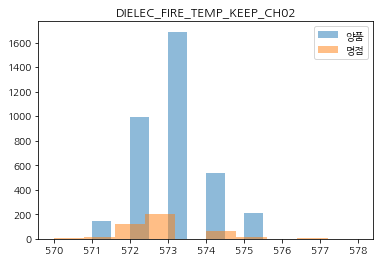

DIELEC_FIRE_TEMP_KEEP_CH03
분석 통계량 => 
statistic:(F) 0.250, p-value: 0.617


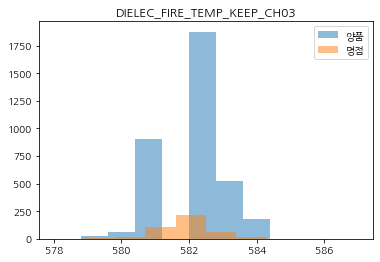

DIELEC_FIRE_TEMP_ANEAL_CH01
분석 통계량 => 
statistic:(F) 0.292, p-value: 0.589


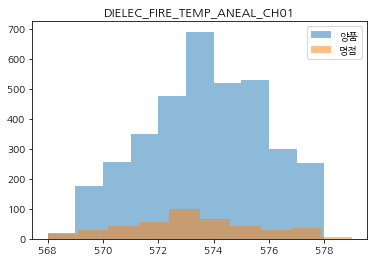

DIELEC_FIRE_TEMP_ANEAL_CH02
분석 통계량 => 
statistic:(F) 1.916, p-value: 0.166


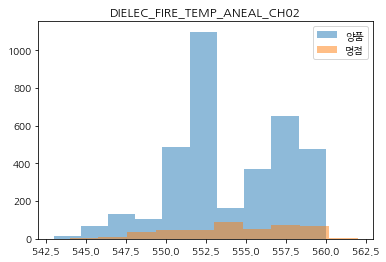

DIELEC_FIRE_TEMP_ANEAL_CH03
분석 통계량 => 
statistic:(F) 15.472, p-value: 0.000


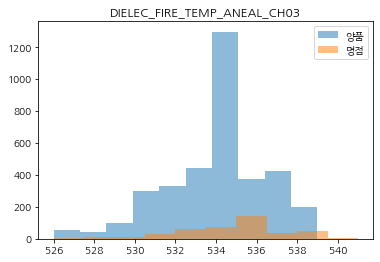

DIELEC_FIRE_EXHAUST_HEAT1
분석 통계량 => 
statistic:(F) 6.489, p-value: 0.011


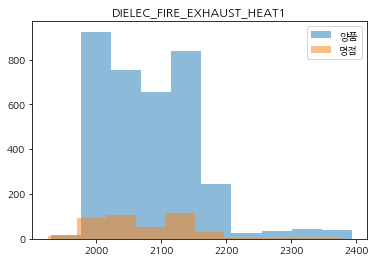

DIELEC_FIRE_EXHAUST_HEAT2
분석 통계량 => 
statistic:(F) 39.650, p-value: 0.000


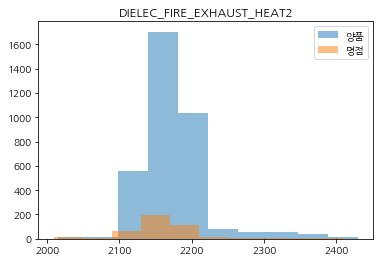

DIELEC_FIRE_EXHAUST_HEAT3
분석 통계량 => 
statistic:(F) 3.147, p-value: 0.076


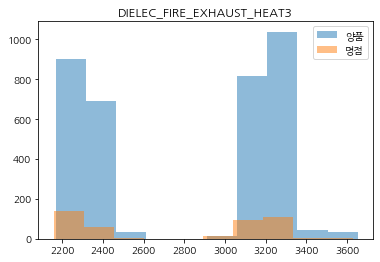

DIELEC_FIRE_EXHAUST_HEAT4
분석 통계량 => 
statistic:(F) 36.526, p-value: 0.000


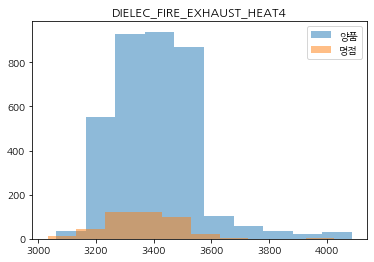

DIELEC_FIRE_EXHAUST_HEAT5
분석 통계량 => 
statistic:(F) 6.090, p-value: 0.014


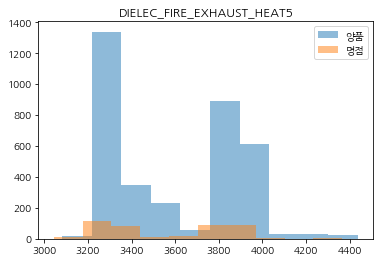

DIELEC_FIRE_EXHAUST_HEAT6
분석 통계량 => 
statistic:(F) 23.173, p-value: 0.000


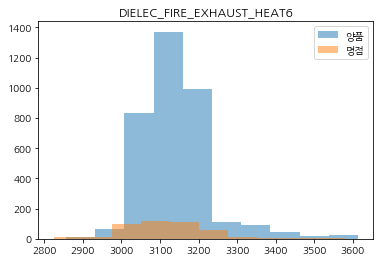

DIELEC_FIRE_EXHAUST_HEAT7
분석 통계량 => 
statistic:(F) 21.779, p-value: 0.000


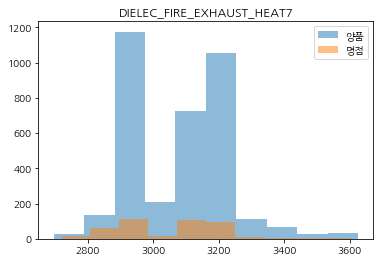

PHOS_R_DRY_TEMP_GLASS_START
분석 통계량 => 
statistic:(F) 47.572, p-value: 0.000


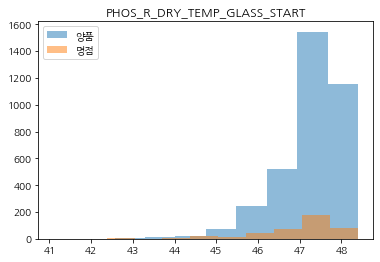

PHOS_R_DRY_TEMP_GLASS_END
분석 통계량 => 
statistic:(F) 81.244, p-value: 0.000


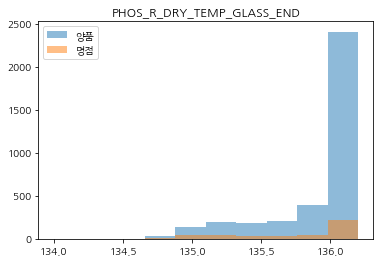

PHOS_R_DRY_TEMP_WALL_START
분석 통계량 => 
statistic:(F) 161.189, p-value: 0.000


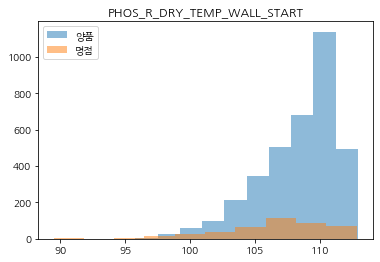

PHOS_R_DRY_TEMP_WALL_MAX
분석 통계량 => 
statistic:(F) 177.706, p-value: 0.000


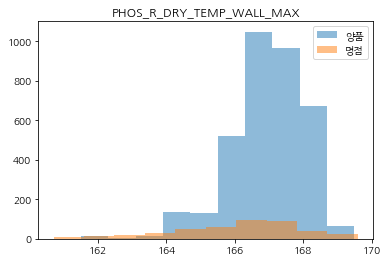

PHOS_R_DRY_PRES_START
분석 통계량 => 
statistic:(F) 4.155, p-value: 0.042


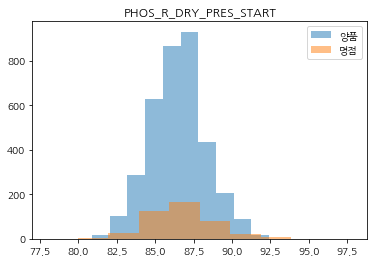

PHOS_R_DRY_PRES_END
분석 통계량 => 
statistic:(F) 2.415, p-value: 0.120


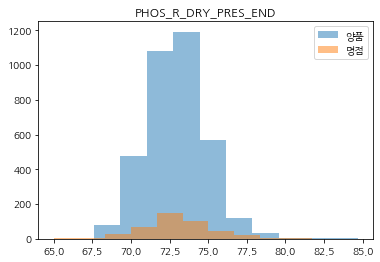

PHOS_R_DRY_TEMP_GLASS_OUT
분석 통계량 => 
statistic:(F) 9.697, p-value: 0.002


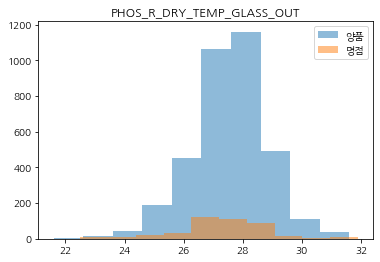

PHOS_R_DRY_TEMP_HOOD_START
분석 통계량 => 
statistic:(F) 1526.914, p-value: 0.000


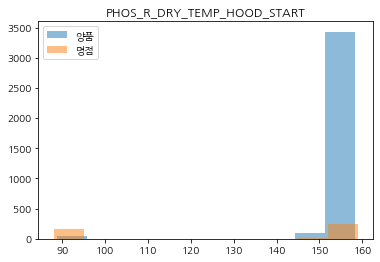

PHOS_R_DRY_TEMP_HOOD_MAX
분석 통계량 => 
statistic:(F) 1523.682, p-value: 0.000


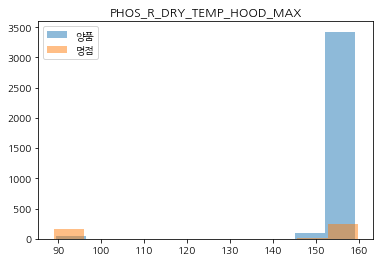

PHOS_G_DRY_TEMP_GLASS_START
분석 통계량 => 
statistic:(F) 52.518, p-value: 0.000


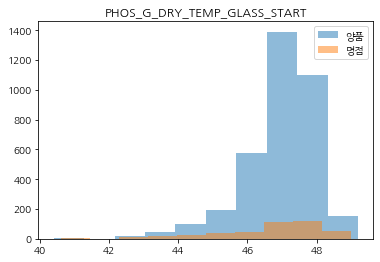

PHOS_G_DRY_TEMP_GLASS_END
분석 통계량 => 
statistic:(F) 5.133, p-value: 0.024


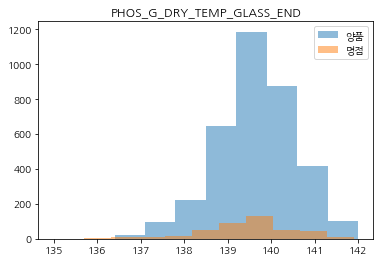

PHOS_G_DRY_TEMP_WALL_START
분석 통계량 => 
statistic:(F) 25.896, p-value: 0.000


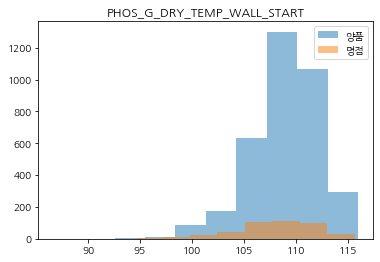

PHOS_G_DRY_TEMP_WALL_MAX
분석 통계량 => 
statistic:(F) 21.928, p-value: 0.000


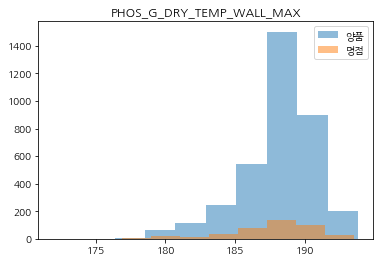

PHOS_G_DRY_PRES_START
분석 통계량 => 
statistic:(F) 4.462, p-value: 0.035


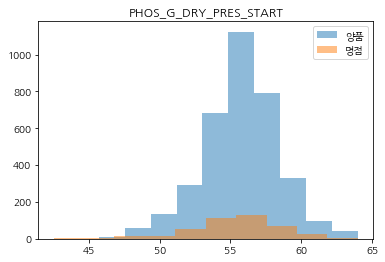

PHOS_G_DRY_PRES_END
분석 통계량 => 
statistic:(F) 28.361, p-value: 0.000


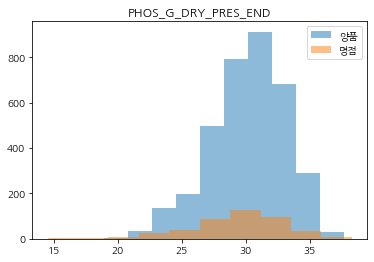

PHOS_G_DRY_TEMP_GLASS_OUT
분석 통계량 => 
statistic:(F) 0.218, p-value: 0.641


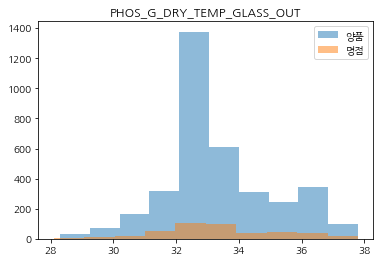

PHOS_G_DRY_TEMP_HOOD_START
분석 통계량 => 
statistic:(F) 0.000, p-value: 0.993


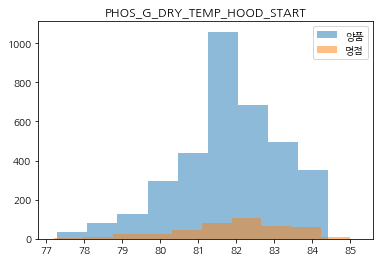

PHOS_G_DRY_TEMP_HOOD_MAX
분석 통계량 => 
statistic:(F) 0.024, p-value: 0.878


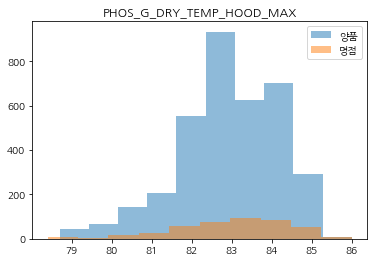

PHOS_FIRE_TEMP_HEAT_CH01
분석 통계량 => 
statistic:(F) 0.355, p-value: 0.551


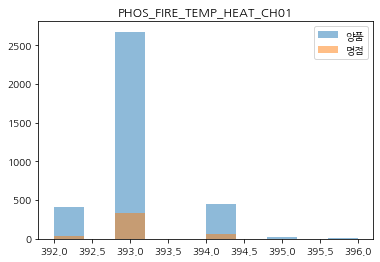

PHOS_FIRE_TEMP_HEAT_CH02
분석 통계량 => 
statistic:(F) 3.936, p-value: 0.047


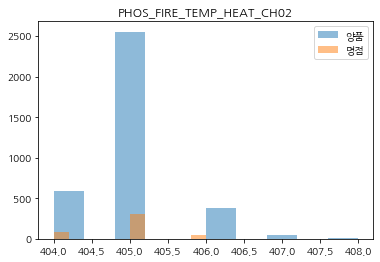

PHOS_FIRE_TEMP_HEAT_CH03
분석 통계량 => 
statistic:(F) 1.661, p-value: 0.198


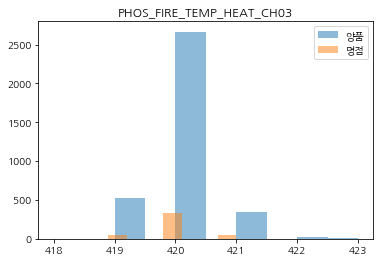

PHOS_FIRE_TEMP_HEAT_CH04
분석 통계량 => 
statistic:(F) 2.091, p-value: 0.148


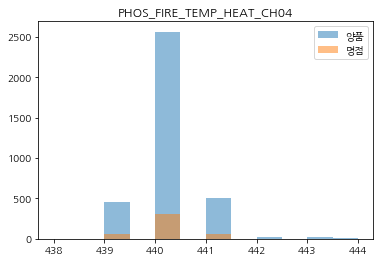

PHOS_FIRE_TEMP_KEEP_CH01
분석 통계량 => 
statistic:(F) 0.028, p-value: 0.866


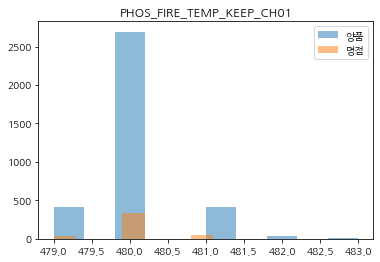

PHOS_FIRE_TEMP_KEEP_CH02
분석 통계량 => 
statistic:(F) 0.483, p-value: 0.487


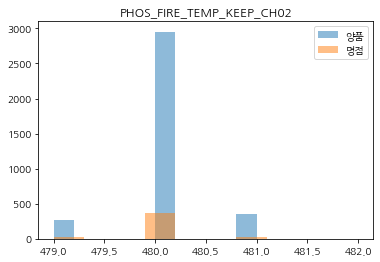

PHOS_FIRE_TEMP_KEEP_CH03
분석 통계량 => 
statistic:(F) 2.220, p-value: 0.136


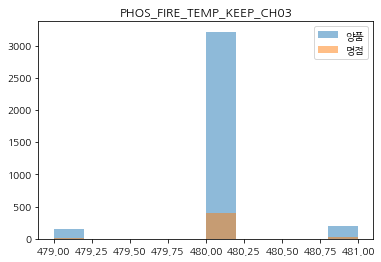

PHOS_FIRE_TEMP_KEEP_CH04
분석 통계량 => 
statistic:(F) 0.158, p-value: 0.691


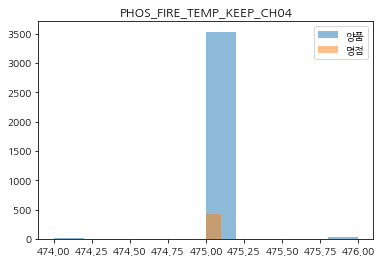

PHOS_FIRE_TEMP_ANEAL_CH01
분석 통계량 => 
statistic:(F) 0.000, p-value: 0.988


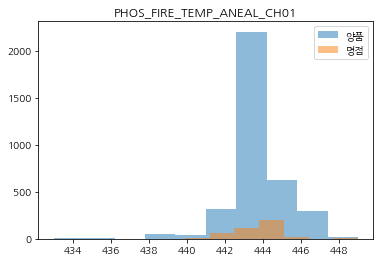

PHOS_FIRE_TEMP_ANEAL_CH02
분석 통계량 => 
statistic:(F) 0.000, p-value: 0.985


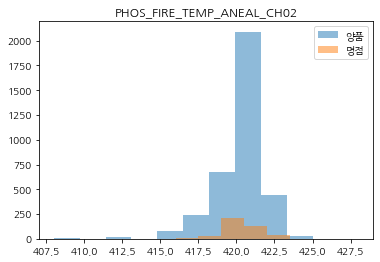

PHOS_FIRE_TEMP_ANEAL_CH03
분석 통계량 => 
statistic:(F) 0.761, p-value: 0.383


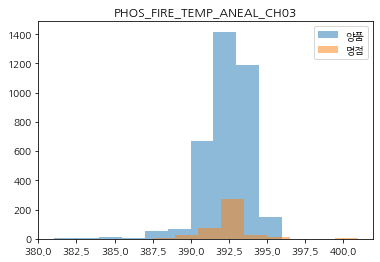

PHOS_FIRE_TEMP_ANEAL_CH04
분석 통계량 => 
statistic:(F) 0.004, p-value: 0.951


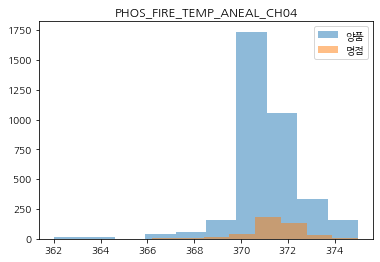

PHOS_FIRE_EXHAUST_HEAT1
분석 통계량 => 
statistic:(F) 0.137, p-value: 0.711


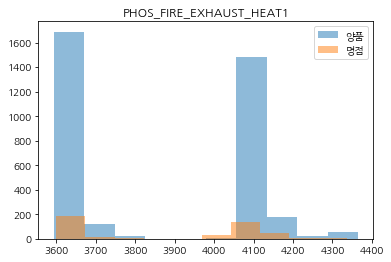

PHOS_FIRE_EXHAUST_HEAT2
분석 통계량 => 
statistic:(F) 20.177, p-value: 0.000


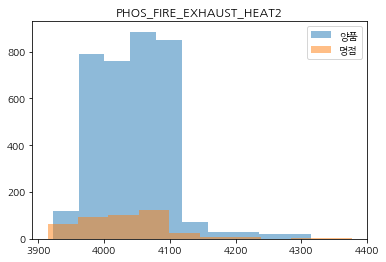

PHOS_FIRE_EXHAUST_HEAT3
분석 통계량 => 
statistic:(F) 58.839, p-value: 0.000


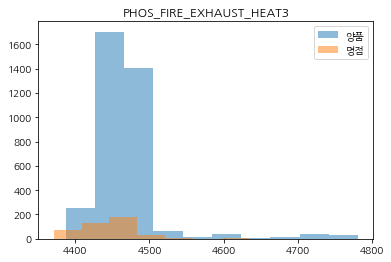

PHOS_FIRE_EXHAUST_HEAT4
분석 통계량 => 
statistic:(F) 17.388, p-value: 0.000


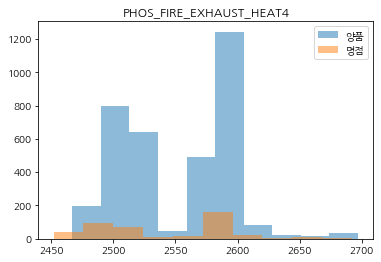

In [27]:
listP=[]
for i in range(96):
    listName=[]
    print(col_list[i+11])
    listName.append(col_list[i+11])
    
    fv, pv=fun_anova(process, 'JUDGE', col_list[i+11])
    
    listName.append(pv)
    
    fun_plot_hist(process,  'JUDGE', col_list[i+11], alpha = 0.5)
    plt.show()
    print("===============================================================")
    listP.append(listName)


In [33]:
for n, value in listP:
    if value<0.05:
        print(n,value.round(3))

BLACK_RTD_TEMP_WALL_START 0.002
BLACK_RTD_TEMP_WALL_MAX 0.0
BLACK_RTD_PRES_START 0.0
BLACK_RTD_TEMP_GLASS_OUT 0.02
BLACK_RTD_TEMP_HOOD_START 0.0
BLACK_RTD_TEMP_HOOD_MAX 0.0
AG_RTD_TEMP_GLASS_END 0.0
AG_RTD_TEMP_WALL_START 0.0
AG_RTD_TEMP_WALL_MAX 0.003
AG_RTD_PRES_END 0.0
AG_RTD_TEMP_GLASS_OUT 0.002
AG_EXPOSURE_TEMP_MASK 0.0
BUS_DEVELOP_TEMP_TANK1 0.0
BUS_DEVELOP_TEMP_TANK2 0.0
BUS_DEVELOP_PH_TANK1.2 0.0
BUS_DEVELOP_PRES2 0.006
BUS_DEVELOP_PRES3 0.0
BUS_FIRE_TEMP_HEAT1_CH03 0.0
BUS_FIRE_TEMP_KEEP_CH01 0.005
BUS_FIRE_TEMP_KEEP_CH02 0.0
BUS_FIRE_TEMP_KEEP_CH03 0.004
BUS_FIRE_TEMP_ANEAL_CH01 0.0
DIELEC_FIRE_TEMP_KEEP_CH01 0.028
DIELEC_FIRE_TEMP_ANEAL_CH03 0.0
DIELEC_FIRE_EXHAUST_HEAT1 0.011
DIELEC_FIRE_EXHAUST_HEAT2 0.0
DIELEC_FIRE_EXHAUST_HEAT4 0.0
DIELEC_FIRE_EXHAUST_HEAT5 0.014
DIELEC_FIRE_EXHAUST_HEAT6 0.0
DIELEC_FIRE_EXHAUST_HEAT7 0.0
PHOS_R_DRY_TEMP_GLASS_START 0.0
PHOS_R_DRY_TEMP_GLASS_END 0.0
PHOS_R_DRY_TEMP_WALL_START 0.0
PHOS_R_DRY_TEMP_WALL_MAX 0.0
PHOS_R_DRY_PRES_START 0.042
P

In [38]:
mgf_df_ratio_date=pd.read_csv("data/mfg_df_ratio_date.csv", encoding="cp949", sep="\t",parse_dates=['날자'])

In [40]:
mgf_df_ratio_date.head()

,날자,명점,양품,불량률
0,2019-04-01,3,30,9%
1,2019-04-02,3,29,9%
2,2019-04-03,1,32,3%
3,2019-04-04,2,31,6%
4,2019-04-05,0,32,0%


In [42]:
mgf_df_ratio_date['rate']=[int(d.split("%")[0]) for d in mgf_df_ratio_date['불량률']]
mgf_df_ratio_date.head()

,날자,명점,양품,불량률,rate
0,2019-04-01,3,30,9%,9
1,2019-04-02,3,29,9%,9
2,2019-04-03,1,32,3%,3
3,2019-04-04,2,31,6%,6
4,2019-04-05,0,32,0%,0


/home/pirl/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


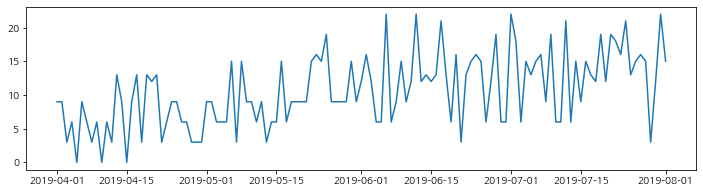

In [44]:
temp=mgf_df_ratio_date[['rate','날자']]
plt.figure(figsize=(12, 3))
temp.set_index('날자')
plt.plot(temp.날자,temp.rate)

#mgf_df_ratio_date[['rate','날자']].plot()

In [50]:
mgf_df_ratio_date['month']=[x.month for x in mgf_df_ratio_date['날자']]
month_temp=mgf_df_ratio_date.groupby('month')['rate'].mean()
month_temp=month_temp.reset_index()

In [52]:
month_temp

,month,rate
0,4,6.433333
1,5,9.645161
2,6,12.133333
3,7,14.096774
4,8,15.000000


In [59]:
mgf_df_ratio_date['montStr']=str(mgf_df_ratio_date['month'])

In [63]:
mgf_df_ratio_date.head()

,날자,명점,양품,불량률,rate,month
0,2019-04-01,3,30,9%,9,4
1,2019-04-02,3,29,9%,9,4
2,2019-04-03,1,32,3%,3,4
3,2019-04-04,2,31,6%,6,4
4,2019-04-05,0,32,0%,0,4


In [64]:
month_temp['monStr']=str(month_temp['month'])

In [68]:
month_temp['monStr']=month_temp['month'].astype('str')

In [71]:
month_temp['monStr']=[t+"월" for t in month_temp['monStr']]

In [72]:
month_temp.head()

,month,rate,monStr
0,4,6.433333,4월
1,5,9.645161,5월
2,6,12.133333,6월
3,7,14.096774,7월
4,8,15.000000,8월


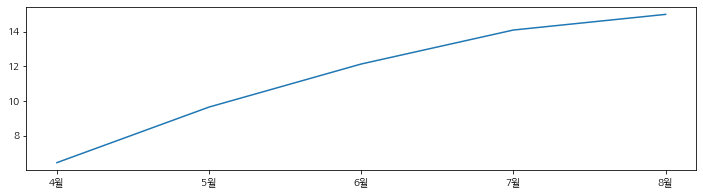

In [73]:
#temp=month_temp[['rate','날자']]
plt.figure(figsize=(12, 3))
month_temp.set_index('monStr')
plt.plot(month_temp.monStr,month_temp.rate)

#mgf_df_ratio_date[['rate','날자']].plot()

In [4]:
mfg_machine=pd.read_csv("data/MFG_MACHINE.csv", encoding="cp949", parse_dates=['DATE_1BLACK', 'TIME_1BLACK', 'TIME_2AG',
       'TIME_3BUS', 'TIME_4DIELEC', 'TIME_5MGO', 'TIME_6PHOS', 'TIME_7PASTE',
       'TIME_8AGING'])
mfg_machine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 29 columns):
JUDGE                     4000 non-null object
LOT_ID                    4000 non-null object
PANEL_ID                  4000 non-null object
DATE_1BLACK               4000 non-null datetime64[ns]
TIME_1BLACK               4000 non-null datetime64[ns]
TIME_2AG                  4000 non-null datetime64[ns]
TIME_3BUS                 4000 non-null datetime64[ns]
TIME_4DIELEC              4000 non-null datetime64[ns]
TIME_5MGO                 4000 non-null datetime64[ns]
TIME_6PHOS                4000 non-null datetime64[ns]
TIME_7PASTE               4000 non-null datetime64[ns]
TIME_8AGING               4000 non-null datetime64[ns]
MC_1BLACK_1PRINT          4000 non-null object
MC_1BLACK_2RTD            4000 non-null object
MC_2AG_1PRINT             4000 non-null object
MC_2AG_2RTD               4000 non-null object
MC_2AG_3EXPOSURE          4000 non-null object
MC_3BUS_1DEVELOP      

In [81]:
mfg_machine[mfg_machine['LOT_ID']=="LOT-300"]

,JUDGE,LOT_ID,PANEL_ID,DATE_1BLACK,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,...,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
3980,양품,LOT-300,PNL-01,2019-08-01,2019-08-01 10:35:00,2019-08-01 15:55:00,2019-08-01 21:35:00,2019-08-07 00:15:00,2019-08-11 14:15:00,2019-08-04 03:35:00,...,3호기,2호기,2호기,1호기,2호기,1호기,1호기,3호기,1호기,2호기
3981,양품,LOT-300,PNL-02,2019-08-01,2019-08-01 11:19:00,2019-08-01 16:39:00,2019-08-01 22:19:00,2019-08-07 00:59:00,2019-08-11 14:59:00,2019-08-04 04:19:00,...,3호기,2호기,2호기,1호기,2호기,1호기,1호기,3호기,1호기,2호기
3982,양품,LOT-300,PNL-03,2019-08-01,2019-08-01 12:03:00,2019-08-01 17:23:00,2019-08-01 23:03:00,2019-08-07 01:43:00,2019-08-11 15:43:00,2019-08-04 05:03:00,...,3호기,2호기,2호기,1호기,2호기,1호기,1호기,3호기,1호기,2호기
3983,양품,LOT-300,PNL-04,2019-08-01,2019-08-01 12:47:00,2019-08-01 18:07:00,2019-08-01 23:47:00,2019-08-07 02:27:00,2019-08-11 16:27:00,2019-08-04 05:47:00,...,3호기,2호기,2호기,1호기,2호기,1호기,1호기,3호기,1호기,2호기
3984,양품,LOT-300,PNL-05,2019-08-01,2019-08-01 13:32:00,2019-08-01 18:52:00,2019-08-02 00:32:00,2019-08-07 03:12:00,2019-08-11 17:12:00,2019-08-04 06:32:00,...,3호기,2호기,2호기,1호기,2호기,1호기,1호기,3호기,1호기,2호기
3985,양품,LOT-300,PNL-06,2019-08-01,2019-08-01 14:16:00,2019-08-01 19:36:00,2019-08-02 01:16:00,2019-08-07 03:56:00,2019-08-11 17:56:00,2019-08-04 07:16:00,...,3호기,2호기,2호기,1호기,2호기,1호기,1호기,3호기,1호기,2호기
3986,양품,LOT-300,PNL-07,2019-08-01,2019-08-01 15:00:00,2019-08-01 20:20:00,2019-08-02 02:00:00,2019-08-07 04:40:00,2019-08-11 18:40:00,2019-08-04 08:00:00,...,3호기,2호기,2호기,1호기,2호기,1호기,1호기,3호기,1호기,2호기
3987,양품,LOT-300,PNL-08,2019-08-01,2019-08-01 15:44:00,2019-08-01 21:04:00,2019-08-02 02:44:00,2019-08-07 05:24:00,2019-08-11 19:24:00,2019-08-04 08:44:00,...,3호기,2호기,2호기,1호기,2호기,1호기,1호기,3호기,1호기,2호기
3988,양품,LOT-300,PNL-09,2019-08-01,2019-08-01 16:29:00,2019-08-01 21:49:00,2019-08-02 03:29:00,2019-08-07 06:09:00,2019-08-11 20:09:00,2019-08-04 09:29:00,...,3호기,2호기,2호기,1호기,2호기,1호기,1호기,3호기,1호기,2호기
3989,명점,LOT-300,PNL-10,2019-08-01,2019-08-01 17:13:00,2019-08-01 22:33:00,2019-08-02 04:13:00,2019-08-07 06:53:00,2019-08-11 20:53:00,2019-08-04 10:13:00,...,3호기,2호기,2호기,1호기,2호기,1호기,1호기,3호기,1호기,2호기


In [84]:
mfg_machine['Start_month']=[x.month for x in mfg_machine['DATE_1BLACK']]
mfg_machine['Start_day']=[x.day for x in mfg_machine['DATE_1BLACK']]


In [ ]:
mfg_machine['first_panel_time']=[mfg_machine['Start_month'] for x in mfg_machine['Date']]

In [104]:
mfg_machine[mfg_machine['Start_month']==4]

,JUDGE,LOT_ID,PANEL_ID,DATE_1BLACK,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,...,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING,Start_month,Start_day
0,양품,LOT-101,PNL-01,2019-04-01,2019-04-01 00:01:00,2019-04-01 05:21:00,2019-04-01 11:01:00,2019-04-06 13:41:00,2019-04-11 03:41:00,2019-04-03 20:20:00,...,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기,4,1
1,양품,LOT-101,PNL-02,2019-04-01,2019-04-01 00:45:00,2019-04-01 06:05:00,2019-04-01 11:45:00,2019-04-06 14:25:00,2019-04-11 04:25:00,2019-04-03 21:04:00,...,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기,4,1
2,양품,LOT-101,PNL-03,2019-04-01,2019-04-01 01:29:00,2019-04-01 06:49:00,2019-04-01 12:29:00,2019-04-06 15:09:00,2019-04-11 05:09:00,2019-04-03 21:48:00,...,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기,4,1
3,양품,LOT-101,PNL-04,2019-04-01,2019-04-01 02:13:00,2019-04-01 07:33:00,2019-04-01 13:13:00,2019-04-06 15:53:00,2019-04-11 05:53:00,2019-04-03 22:32:00,...,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기,4,1
4,양품,LOT-101,PNL-05,2019-04-01,2019-04-01 02:58:00,2019-04-01 08:18:00,2019-04-01 13:58:00,2019-04-06 16:38:00,2019-04-11 06:38:00,2019-04-03 23:17:00,...,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기,4,1
5,양품,LOT-101,PNL-06,2019-04-01,2019-04-01 03:42:00,2019-04-01 09:02:00,2019-04-01 14:42:00,2019-04-06 17:22:00,2019-04-11 07:22:00,2019-04-04 00:01:00,...,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기,4,1
6,양품,LOT-101,PNL-07,2019-04-01,2019-04-01 04:26:00,2019-04-01 09:46:00,2019-04-01 15:26:00,2019-04-06 18:06:00,2019-04-11 08:06:00,2019-04-04 00:45:00,...,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기,4,1
7,양품,LOT-101,PNL-08,2019-04-01,2019-04-01 05:10:00,2019-04-01 10:30:00,2019-04-01 16:10:00,2019-04-06 18:50:00,2019-04-11 08:50:00,2019-04-04 01:29:00,...,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기,4,1
8,양품,LOT-101,PNL-09,2019-04-01,2019-04-01 05:55:00,2019-04-01 11:15:00,2019-04-01 16:55:00,2019-04-06 19:35:00,2019-04-11 09:35:00,2019-04-04 02:14:00,...,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기,4,1
9,양품,LOT-101,PNL-10,2019-04-01,2019-04-01 06:39:00,2019-04-01 11:59:00,2019-04-01 17:39:00,2019-04-06 20:19:00,2019-04-11 10:19:00,2019-04-04 02:58:00,...,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기,4,1


In [102]:
day5=mfg_machine[((mfg_machine['Start_month']==5) & (mfg_machine['Start_day']==1))]
day4 = mfg_machine[mfg_machine['Start_month']==4]

unique_lot_id=[pd.concat([day4, day5])['LOT_ID'].unique()]

In [107]:
mfg_april=mfg_machine[:980]

In [109]:
mfg_machine[mfg_machine['Start_month']==7]

,JUDGE,LOT_ID,PANEL_ID,DATE_1BLACK,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,...,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING,Start_month,Start_day
2959,명점,LOT-248,PNL-20,2019-07-01,2019-07-01 00:43:00,2019-07-01 06:03:00,2019-07-01 11:43:00,2019-07-06 14:23:00,2019-07-11 04:23:00,2019-07-03 18:35:00,...,1호기,1호기,2호기,1호기,1호기,3호기,2호기,1호기,7,1
2960,양품,LOT-249,PNL-01,2019-07-01,2019-07-01 01:29:00,2019-07-01 06:49:00,2019-07-01 12:29:00,2019-07-06 15:09:00,2019-07-11 05:09:00,2019-07-03 19:20:00,...,1호기,1호기,1호기,1호기,2호기,3호기,1호기,1호기,7,1
2961,양품,LOT-249,PNL-02,2019-07-01,2019-07-01 02:13:00,2019-07-01 07:33:00,2019-07-01 13:13:00,2019-07-06 15:53:00,2019-07-11 05:53:00,2019-07-03 20:04:00,...,1호기,1호기,1호기,1호기,2호기,3호기,1호기,1호기,7,1
2962,양품,LOT-249,PNL-03,2019-07-01,2019-07-01 02:57:00,2019-07-01 08:17:00,2019-07-01 13:57:00,2019-07-06 16:37:00,2019-07-11 06:37:00,2019-07-03 20:48:00,...,1호기,1호기,1호기,1호기,2호기,3호기,1호기,1호기,7,1
2963,양품,LOT-249,PNL-04,2019-07-01,2019-07-01 03:41:00,2019-07-01 09:01:00,2019-07-01 14:41:00,2019-07-06 17:21:00,2019-07-11 07:21:00,2019-07-03 21:32:00,...,1호기,1호기,1호기,1호기,2호기,3호기,1호기,1호기,7,1
2964,양품,LOT-249,PNL-05,2019-07-01,2019-07-01 04:26:00,2019-07-01 09:46:00,2019-07-01 15:26:00,2019-07-06 18:06:00,2019-07-11 08:06:00,2019-07-03 22:17:00,...,1호기,1호기,1호기,1호기,2호기,3호기,1호기,1호기,7,1
2965,명점,LOT-249,PNL-06,2019-07-01,2019-07-01 05:10:00,2019-07-01 10:30:00,2019-07-01 16:10:00,2019-07-06 18:50:00,2019-07-11 08:50:00,2019-07-03 23:01:00,...,1호기,1호기,1호기,1호기,2호기,3호기,1호기,1호기,7,1
2966,양품,LOT-249,PNL-07,2019-07-01,2019-07-01 05:54:00,2019-07-01 11:14:00,2019-07-01 16:54:00,2019-07-06 19:34:00,2019-07-11 09:34:00,2019-07-03 23:45:00,...,1호기,1호기,1호기,1호기,2호기,3호기,1호기,1호기,7,1
2967,명점,LOT-249,PNL-08,2019-07-01,2019-07-01 06:38:00,2019-07-01 11:58:00,2019-07-01 17:38:00,2019-07-06 20:18:00,2019-07-11 10:18:00,2019-07-04 00:29:00,...,1호기,1호기,1호기,1호기,2호기,3호기,1호기,1호기,7,1
2968,양품,LOT-249,PNL-09,2019-07-01,2019-07-01 07:23:00,2019-07-01 12:43:00,2019-07-01 18:23:00,2019-07-06 21:03:00,2019-07-11 11:03:00,2019-07-04 01:14:00,...,1호기,1호기,1호기,1호기,2호기,3호기,1호기,1호기,7,1


In [112]:
mfg_july=mfg_machine[2960:]

In [114]:
mfg_april_july=pd.concat([mfg_april,mfg_july])

In [125]:
majRate=mfg_april_july.groupby(['LOT_ID','JUDGE'])['PANEL_ID'].count()
majRate=majRate.reset_index()

In [126]:
majRate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 3 columns):
LOT_ID      190 non-null object
JUDGE       190 non-null object
PANEL_ID    190 non-null int64
dtypes: int64(1), object(2)
memory usage: 4.5+ KB


In [128]:
majRate['rate']=[(int(x)/20)*100 for x in majRate['PANEL_ID']]
majRate

,LOT_ID,JUDGE,PANEL_ID,rate
0,LOT-101,명점,2,10.0
1,LOT-101,양품,18,90.0
2,LOT-102,명점,1,5.0
3,LOT-102,양품,19,95.0
4,LOT-103,명점,3,15.0
5,LOT-103,양품,17,85.0
6,LOT-104,양품,20,100.0
7,LOT-105,명점,2,10.0
8,LOT-105,양품,18,90.0
9,LOT-106,양품,20,100.0


In [129]:
majRate[majRate['JUDGE']=="명점"]

,LOT_ID,JUDGE,PANEL_ID,rate
0,LOT-101,명점,2,10.0
2,LOT-102,명점,1,5.0
4,LOT-103,명점,3,15.0
7,LOT-105,명점,2,10.0
10,LOT-107,명점,1,5.0
13,LOT-109,명점,1,5.0
15,LOT-110,명점,2,10.0
17,LOT-111,명점,2,10.0
19,LOT-112,명점,1,5.0
22,LOT-114,명점,1,5.0


In [153]:
mfg_april
mfg_april_rate=mfg_april.groupby(['LOT_ID','JUDGE'])['PANEL_ID'].count()
mfg_april_rate=mfg_april_rate.reset_index()
mfg_april_rate['rate']=[(int(x)/20)*100 for x in mfg_april_rate['PANEL_ID']]
mfg_april_rate[mfg_april_rate['JUDGE']=="명점"].sort_values(by='rate', ascending=False)
april_LOT_ID=mfg_april_rate[(mfg_april_rate['rate']>6.5)& (mfg_april_rate['JUDGE']=="명점")]['LOT_ID']
april_LOT_ID

0     LOT-101
4     LOT-103
7     LOT-105
15    LOT-110
17    LOT-111
33    LOT-120
35    LOT-121
39    LOT-123
42    LOT-125
46    LOT-127
51    LOT-130
53    LOT-131
55    LOT-132
57    LOT-133
59    LOT-134
61    LOT-135
64    LOT-137
67    LOT-139
69    LOT-140
77    LOT-144
Name: LOT_ID, dtype: object

In [154]:
mfg_july_rate=mfg_july.groupby(['LOT_ID','JUDGE'])['PANEL_ID'].count()
mfg_july_rate=mfg_july_rate.reset_index()
mfg_july_rate['rate']=[(int(x)/20)*100 for x in mfg_july_rate['PANEL_ID']]
mfg_july_rate[mfg_july_rate['JUDGE']=="명점"].sort_values(by='rate', ascending=False)
july_LOT_ID=mfg_july_rate[(mfg_july_rate['rate']>14.7)& (mfg_july_rate['JUDGE']=="명점")]['LOT_ID']
july_LOT_ID

0      LOT-249
2      LOT-250
4      LOT-251
10     LOT-254
16     LOT-257
18     LOT-258
20     LOT-259
24     LOT-261
26     LOT-262
36     LOT-267
42     LOT-270
48     LOT-273
50     LOT-274
52     LOT-275
58     LOT-278
60     LOT-279
64     LOT-281
66     LOT-282
68     LOT-283
70     LOT-284
74     LOT-286
76     LOT-287
78     LOT-288
80     LOT-289
84     LOT-291
87     LOT-293
93     LOT-296
97     LOT-298
99     LOT-299
101    LOT-300
Name: LOT_ID, dtype: object

In [155]:
mfg_july_rate

,LOT_ID,JUDGE,PANEL_ID,rate
0,LOT-249,명점,5,25.0
1,LOT-249,양품,15,75.0
2,LOT-250,명점,3,15.0
3,LOT-250,양품,17,85.0
4,LOT-251,명점,4,20.0
5,LOT-251,양품,16,80.0
6,LOT-252,명점,1,5.0
7,LOT-252,양품,19,95.0
8,LOT-253,명점,2,10.0
9,LOT-253,양품,18,90.0


In [161]:
mfg_machine.groupby(['LOT_ID','MC_1BLACK_1PRINT', 'MC_1BLACK_2RTD',\
'MC_2AG_1PRINT', 'MC_2AG_2RTD', 'MC_2AG_3EXPOSURE', 'MC_3BUS_1DEVELOP',\
'MC_3BUS_2FIRE', 'MC_4DIELEC_1FIRE', 'MC_5MGO',\
'MC_6PHOS_1R_1DISPENSER', 'MC_6PHOS_1R_2DRY', 'MC_6PHOS_2G_1DISPENSER',\
'MC_6PHOS_2G_2DRY', 'MC_6PHOS_3B_1DISPENSER', 'MC_6PHOS_4FIRE',\
'MC_7PASTE', 'MC_8AGING','JUDGE'])['PANEL_ID'].count()

LOT_ID   MC_1BLACK_1PRINT  MC_1BLACK_2RTD  MC_2AG_1PRINT  MC_2AG_2RTD  MC_2AG_3EXPOSURE  MC_3BUS_1DEVELOP  MC_3BUS_2FIRE  MC_4DIELEC_1FIRE  MC_5MGO  MC_6PHOS_1R_1DISPENSER  MC_6PHOS_1R_2DRY  MC_6PHOS_2G_1DISPENSER  MC_6PHOS_2G_2DRY  MC_6PHOS_3B_1DISPENSER  MC_6PHOS_4FIRE  MC_7PASTE  MC_8AGING  JUDGE
LOT-101  2호기               2호기             1호기            1호기          2호기               1호기               1호기            3호기               1호기      1호기                     2호기               2호기                     2호기               1호기                     3호기             1호기        2호기        명점        2
                                                                                                                                                                                                                                                                                                       양품       18
LOT-102  1호기               1호기             2호기            1호기          2호기           

In [169]:
r=pd.read_csv("data/참조용-mfg_df_ratio_machine.csv", sep=",", encoding="utf-8")

In [170]:
r.head()

,LOT_ID,명점,양품,불량률,MC_1BLACK_1PRINT,MC_1BLACK_2RTD,MC_2AG_1PRINT,MC_2AG_2RTD,MC_2AG_3EXPOSURE,MC_3BUS_1DEVELOP,...,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
0,LOT-101,2,18,10%,2호기,2호기,1호기,1호기,2호기,1호기,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
1,LOT-102,1,19,5%,1호기,1호기,2호기,1호기,2호기,1호기,...,3호기,2호기,1호기,2호기,1호기,1호기,2호기,3호기,2호기,2호기
2,LOT-103,3,17,15%,2호기,2호기,1호기,1호기,2호기,2호기,...,2호기,2호기,1호기,2호기,1호기,2호기,1호기,1호기,2호기,2호기
3,LOT-104,0,20,0%,1호기,1호기,2호기,2호기,1호기,2호기,...,3호기,2호기,1호기,2호기,1호기,1호기,1호기,2호기,2호기,1호기
4,LOT-105,2,18,10%,2호기,1호기,1호기,1호기,1호기,1호기,...,1호기,2호기,1호기,2호기,1호기,2호기,2호기,2호기,2호기,1호기


In [179]:
april_LOT_ID.values

array(['LOT-101', 'LOT-103', 'LOT-105', 'LOT-110', 'LOT-111', 'LOT-120',
       'LOT-121', 'LOT-123', 'LOT-125', 'LOT-127', 'LOT-130', 'LOT-131',
       'LOT-132', 'LOT-133', 'LOT-134', 'LOT-135', 'LOT-137', 'LOT-139',
       'LOT-140', 'LOT-144'], dtype=object)

In [182]:
df=pd.DataFrame()

for lotId in april_LOT_ID:
    temp=r[r['LOT_ID']==lotId]
    df=pd.concat([df,temp])

In [183]:
df

,LOT_ID,명점,양품,불량률,MC_1BLACK_1PRINT,MC_1BLACK_2RTD,MC_2AG_1PRINT,MC_2AG_2RTD,MC_2AG_3EXPOSURE,MC_3BUS_1DEVELOP,...,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
0,LOT-101,2,18,10%,2호기,2호기,1호기,1호기,2호기,1호기,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
2,LOT-103,3,17,15%,2호기,2호기,1호기,1호기,2호기,2호기,...,2호기,2호기,1호기,2호기,1호기,2호기,1호기,1호기,2호기,2호기
4,LOT-105,2,18,10%,2호기,1호기,1호기,1호기,1호기,1호기,...,1호기,2호기,1호기,2호기,1호기,2호기,2호기,2호기,2호기,1호기
9,LOT-110,2,18,10%,1호기,2호기,2호기,1호기,2호기,2호기,...,2호기,2호기,1호기,2호기,2호기,2호기,2호기,2호기,1호기,1호기
10,LOT-111,2,18,10%,2호기,1호기,1호기,2호기,2호기,1호기,...,1호기,2호기,1호기,1호기,1호기,2호기,2호기,3호기,2호기,1호기
19,LOT-120,2,18,10%,2호기,1호기,1호기,2호기,1호기,1호기,...,2호기,1호기,1호기,1호기,2호기,1호기,2호기,1호기,2호기,2호기
20,LOT-121,2,18,10%,1호기,1호기,1호기,1호기,2호기,2호기,...,2호기,2호기,2호기,1호기,2호기,2호기,2호기,3호기,1호기,2호기
22,LOT-123,2,18,10%,1호기,1호기,2호기,2호기,1호기,1호기,...,1호기,1호기,2호기,2호기,1호기,1호기,2호기,3호기,1호기,2호기
24,LOT-125,2,18,10%,1호기,1호기,2호기,1호기,2호기,1호기,...,3호기,1호기,1호기,1호기,2호기,1호기,2호기,3호기,1호기,1호기
26,LOT-127,3,17,15%,2호기,1호기,1호기,1호기,1호기,2호기,...,2호기,1호기,1호기,2호기,2호기,1호기,1호기,3호기,1호기,1호기


In [ ]:
july_LOT_ID

In [185]:
df2=pd.DataFrame()

for lotId in july_LOT_ID:
    temp=r[r['LOT_ID']==lotId]
    df2=pd.concat([df2,temp])

In [186]:
df2

,LOT_ID,명점,양품,불량률,MC_1BLACK_1PRINT,MC_1BLACK_2RTD,MC_2AG_1PRINT,MC_2AG_2RTD,MC_2AG_3EXPOSURE,MC_3BUS_1DEVELOP,...,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
148,LOT-249,5,15,25%,1호기,1호기,1호기,1호기,2호기,2호기,...,2호기,2호기,1호기,1호기,1호기,1호기,2호기,3호기,1호기,1호기
149,LOT-250,3,17,15%,1호기,1호기,1호기,1호기,1호기,1호기,...,1호기,2호기,2호기,1호기,2호기,2호기,1호기,3호기,1호기,2호기
150,LOT-251,4,16,20%,2호기,1호기,2호기,2호기,2호기,2호기,...,2호기,2호기,2호기,1호기,1호기,2호기,2호기,2호기,1호기,2호기
153,LOT-254,4,16,20%,1호기,2호기,1호기,2호기,2호기,1호기,...,3호기,1호기,2호기,1호기,2호기,1호기,2호기,3호기,1호기,2호기
156,LOT-257,3,17,15%,2호기,2호기,1호기,1호기,1호기,1호기,...,1호기,2호기,2호기,1호기,1호기,1호기,1호기,3호기,1호기,2호기
157,LOT-258,3,17,15%,1호기,1호기,1호기,1호기,1호기,2호기,...,3호기,1호기,2호기,2호기,2호기,2호기,2호기,1호기,2호기,1호기
158,LOT-259,3,17,15%,2호기,1호기,2호기,1호기,2호기,2호기,...,1호기,1호기,2호기,1호기,1호기,1호기,1호기,1호기,2호기,2호기
160,LOT-261,3,17,15%,1호기,1호기,2호기,2호기,1호기,2호기,...,2호기,2호기,2호기,1호기,1호기,1호기,1호기,2호기,1호기,1호기
161,LOT-262,4,16,20%,1호기,1호기,1호기,1호기,1호기,1호기,...,2호기,2호기,2호기,2호기,1호기,1호기,1호기,2호기,1호기,2호기
166,LOT-267,4,16,20%,1호기,1호기,1호기,2호기,2호기,1호기,...,1호기,1호기,2호기,1호기,1호기,2호기,2호기,3호기,2호기,2호기


In [190]:
col=['MC_1BLACK_1PRINT', 'MC_1BLACK_2RTD',\
'MC_2AG_1PRINT', 'MC_2AG_2RTD', 'MC_2AG_3EXPOSURE', 'MC_3BUS_1DEVELOP',\
'MC_3BUS_2FIRE', 'MC_4DIELEC_1FIRE', 'MC_5MGO',\
'MC_6PHOS_1R_1DISPENSER', 'MC_6PHOS_1R_2DRY', 'MC_6PHOS_2G_1DISPENSER',\
'MC_6PHOS_2G_2DRY', 'MC_6PHOS_3B_1DISPENSER', 'MC_6PHOS_4FIRE',\
'MC_7PASTE', 'MC_8AGING']
for i in col:
    print(i)
    print("april",df[i].value_counts()/20)
    print("julyData",df2[i].value_counts()/30)
    print("="*100)

MC_1BLACK_1PRINT
april 2호기    0.6
1호기    0.4
Name: MC_1BLACK_1PRINT, dtype: float64
julyData 1호기    0.566667
2호기    0.433333
Name: MC_1BLACK_1PRINT, dtype: float64
MC_1BLACK_2RTD
april 1호기    0.65
2호기    0.35
Name: MC_1BLACK_2RTD, dtype: float64
julyData 1호기    0.6
2호기    0.4
Name: MC_1BLACK_2RTD, dtype: float64
MC_2AG_1PRINT
april 1호기    0.5
2호기    0.5
Name: MC_2AG_1PRINT, dtype: float64
julyData 1호기    0.566667
2호기    0.433333
Name: MC_2AG_1PRINT, dtype: float64
MC_2AG_2RTD
april 1호기    0.65
2호기    0.35
Name: MC_2AG_2RTD, dtype: float64
julyData 1호기    0.666667
2호기    0.333333
Name: MC_2AG_2RTD, dtype: float64
MC_2AG_3EXPOSURE
april 2호기    0.55
1호기    0.45
Name: MC_2AG_3EXPOSURE, dtype: float64
julyData 1호기    0.566667
2호기    0.433333
Name: MC_2AG_3EXPOSURE, dtype: float64
MC_3BUS_1DEVELOP
april 1호기    0.7
2호기    0.3
Name: MC_3BUS_1DEVELOP, dtype: float64
julyData 1호기    0.566667
2호기    0.433333
Name: MC_3BUS_1DEVELOP, dtype: float64
MC_3BUS_2FIRE
april 2호기    0.55
1호기    0.45
Name: 

In [192]:
for c in process.columns:
    print(c)

JUDGE
LOT_ID
PANEL_ID
TIME_1BLACK
TIME_2AG
TIME_3BUS
TIME_4DIELEC
TIME_5MGO
TIME_6PHOS
TIME_7PASTE
TIME_8AGING
BLACK_RTD_TEMP_GLASS_START
BLACK_RTD_TEMP_GLASS_END
BLACK_RTD_TEMP_WALL_START
BLACK_RTD_TEMP_WALL_MAX
BLACK_RTD_PRES_START
BLACK_RTD_PRES_END
BLACK_RTD_TEMP_GLASS_OUT
BLACK_RTD_TEMP_HOOD_START
BLACK_RTD_TEMP_HOOD_MAX
AG_RTD_TEMP_GLASS_START
AG_RTD_TEMP_GLASS_END
AG_RTD_TEMP_WALL_START
AG_RTD_TEMP_WALL_MAX
AG_RTD_PRES_START
AG_RTD_PRES_END
AG_RTD_TEMP_GLASS_OUT
AG_RTD_TEMP_HOOD_START
AG_RTD_TEMP_HOOD_MAX
AG_EXPOSURE_TEMP_MASK
BUS_DEVELOP_TEMP_OVEN1
BUS_DEVELOP_TEMP_OVEN2
BUS_DEVELOP_TEMP_OVEN3
BUS_DEVELOP_PH_TANK1
BUS_DEVELOP_TEMP_TANK1
BUS_DEVELOP_PH_TANK1.1
BUS_DEVELOP_TEMP_TANK2
BUS_DEVELOP_PH_TANK1.2
BUS_DEVELOP_TEMP_TANK3
BUS_DEVELOP_PRES1
BUS_DEVELOP_PRES2
BUS_DEVELOP_PRES3
BUS_FIRE_TEMP_HEAT1_CH01
BUS_FIRE_TEMP_HEAT1_CH02
BUS_FIRE_TEMP_HEAT1_CH03
BUS_FIRE_TEMP_HEAT2_CH01
BUS_FIRE_TEMP_HEAT2_CH02
BUS_FIRE_TEMP_HEAT2_CH03
BUS_FIRE_TEMP_KEEP_CH01
BUS_FIRE_TEMP_KEEP_CH02
BUS

In [229]:
black_rtd=['LOT_ID','PANEL_ID','BLACK_RTD_TEMP_GLASS_START',
'BLACK_RTD_TEMP_GLASS_END',
'BLACK_RTD_TEMP_WALL_START',
'BLACK_RTD_TEMP_WALL_MAX',
'BLACK_RTD_PRES_START',
'BLACK_RTD_PRES_END',
'BLACK_RTD_TEMP_GLASS_OUT',
'BLACK_RTD_TEMP_HOOD_START',
'BLACK_RTD_TEMP_HOOD_MAX']

In [230]:
bRTD_process=process[black_rtd]


In [225]:
process.head()

,JUDGE,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,TIME_7PASTE,...,PHOS_FIRE_TEMP_KEEP_CH03,PHOS_FIRE_TEMP_KEEP_CH04,PHOS_FIRE_TEMP_ANEAL_CH01,PHOS_FIRE_TEMP_ANEAL_CH02,PHOS_FIRE_TEMP_ANEAL_CH03,PHOS_FIRE_TEMP_ANEAL_CH04,PHOS_FIRE_EXHAUST_HEAT1,PHOS_FIRE_EXHAUST_HEAT2,PHOS_FIRE_EXHAUST_HEAT3,PHOS_FIRE_EXHAUST_HEAT4
0,양품,LOT-101,PNL-01,2019-04-01 0:01,2019-04-01 5:21,2019-04-01 11:01,2019-04-06 13:41,2019-04-11 3:41,2019-04-03 20:20,2019-04-11 12:41,...,480.0,475.0,443.0,419.0,392.0,372.0,4115.0,3973.0,4432.0,2506.0
1,양품,LOT-101,PNL-02,2019-04-01 0:45,2019-04-01 6:05,2019-04-01 11:45,2019-04-06 14:25,2019-04-11 4:25,2019-04-03 21:04,2019-04-11 13:25,...,480.0,475.0,445.0,423.0,395.0,374.0,3642.0,4097.0,4499.0,2573.0
2,양품,LOT-101,PNL-03,2019-04-01 1:29,2019-04-01 6:49,2019-04-01 12:29,2019-04-06 15:09,2019-04-11 5:09,2019-04-03 21:48,2019-04-11 14:09,...,480.0,475.0,444.0,421.0,393.0,372.0,4063.0,3972.0,4460.0,2502.0
3,양품,LOT-101,PNL-04,2019-04-01 2:13,2019-04-01 7:33,2019-04-01 13:13,2019-04-06 15:53,2019-04-11 5:53,2019-04-03 22:32,2019-04-11 14:53,...,480.0,475.0,444.0,420.0,393.0,372.0,4131.0,4011.0,4466.0,2522.0
4,양품,LOT-101,PNL-05,2019-04-01 2:58,2019-04-01 8:18,2019-04-01 13:58,2019-04-06 16:38,2019-04-11 6:38,2019-04-03 23:17,2019-04-11 15:38,...,480.0,475.0,443.0,420.0,392.0,372.0,3632.0,4073.0,4482.0,2584.0


In [228]:
bRTD_process.head()

,LOT_ID,BLACK_RTD_TEMP_GLASS_START,BLACK_RTD_TEMP_GLASS_END,BLACK_RTD_TEMP_WALL_START,BLACK_RTD_TEMP_WALL_MAX,BLACK_RTD_PRES_START,BLACK_RTD_PRES_END,BLACK_RTD_TEMP_GLASS_OUT,BLACK_RTD_TEMP_HOOD_START,BLACK_RTD_TEMP_HOOD_MAX
0,LOT-101,44.3,102.3,88.8,114.8,229.5,156.5,58.9,93.2,96.0
1,LOT-101,44.6,101.6,88.7,114.3,216.9,155.9,59.0,93.9,96.0
2,LOT-101,45.0,114.3,90.3,115.0,217.4,140.6,58.7,94.0,95.7
3,LOT-101,44.0,115.0,88.6,115.4,242.5,152.4,58.8,94.0,97.0
4,LOT-101,44.8,109.6,89.2,114.5,218.3,151.8,57.3,94.0,95.5


In [244]:
april_LOT_ID.values

temp=['LOT-101', 'LOT-103', 'LOT-105', 'LOT-110', 'LOT-111', 'LOT-120',
       'LOT-121', 'LOT-123', 'LOT-125', 'LOT-127', 'LOT-130', 'LOT-131',
       'LOT-132', 'LOT-133', 'LOT-134', 'LOT-135', 'LOT-137', 'LOT-139',
       'LOT-140', 'LOT-144']

In [250]:
pro_mac=pd.merge(bRTD_process, mfg_machine, on=["LOT_ID",'PANEL_ID'], how="inner")
pro_mac.groupby('LOT_ID')[black_rtd].mean().loc[temp]

,BLACK_RTD_TEMP_GLASS_START,BLACK_RTD_TEMP_GLASS_END,BLACK_RTD_TEMP_WALL_START,BLACK_RTD_TEMP_WALL_MAX,BLACK_RTD_PRES_START,BLACK_RTD_PRES_END,BLACK_RTD_TEMP_GLASS_OUT,BLACK_RTD_TEMP_HOOD_START,BLACK_RTD_TEMP_HOOD_MAX
LOT_ID,,,,,,,,,
LOT-101,44.550,105.540,89.085,114.890,212.860,152.030,58.745,93.305,95.940
LOT-103,43.870,107.495,88.790,114.895,200.645,162.555,59.165,93.790,96.545
LOT-105,44.135,107.510,89.135,114.785,197.650,157.435,58.785,93.270,96.085
LOT-110,44.495,106.880,89.480,115.040,198.160,154.240,58.960,93.540,96.445
LOT-111,43.800,108.315,88.915,114.460,196.895,172.975,58.735,93.690,96.520
LOT-120,44.060,106.705,88.905,114.985,199.105,176.170,58.630,93.575,96.175
LOT-121,44.410,108.510,89.315,114.860,193.060,164.445,58.860,93.800,96.600
LOT-123,44.280,107.825,88.980,114.960,198.070,164.020,58.960,93.515,96.165
LOT-125,44.050,106.345,88.690,114.480,192.890,163.975,59.000,92.940,95.605


In [209]:
mfg_machine['LOT_ID']

0       LOT-101
1       LOT-101
2       LOT-101
3       LOT-101
4       LOT-101
5       LOT-101
6       LOT-101
7       LOT-101
8       LOT-101
9       LOT-101
10      LOT-101
11      LOT-101
12      LOT-101
13      LOT-101
14      LOT-101
15      LOT-101
16      LOT-101
17      LOT-101
18      LOT-101
19      LOT-101
20      LOT-102
21      LOT-102
22      LOT-102
23      LOT-102
24      LOT-102
25      LOT-102
26      LOT-102
27      LOT-102
28      LOT-102
29      LOT-102
         ...   
3970    LOT-299
3971    LOT-299
3972    LOT-299
3973    LOT-299
3974    LOT-299
3975    LOT-299
3976    LOT-299
3977    LOT-299
3978    LOT-299
3979    LOT-299
3980    LOT-300
3981    LOT-300
3982    LOT-300
3983    LOT-300
3984    LOT-300
3985    LOT-300
3986    LOT-300
3987    LOT-300
3988    LOT-300
3989    LOT-300
3990    LOT-300
3991    LOT-300
3992    LOT-300
3993    LOT-300
3994    LOT-300
3995    LOT-300
3996    LOT-300
3997    LOT-300
3998    LOT-300
3999    LOT-300
Name: LOT_ID, Length: 40

In [198]:
mfg_machine.head(1).T

,0
JUDGE,양품
LOT_ID,LOT-101
PANEL_ID,PNL-01
DATE_1BLACK,2019-04-01 00:00:00
TIME_1BLACK,2019-04-01 00:01:00
TIME_2AG,2019-04-01 05:21:00
TIME_3BUS,2019-04-01 11:01:00
TIME_4DIELEC,2019-04-06 13:41:00
TIME_5MGO,2019-04-11 03:41:00
TIME_6PHOS,2019-04-03 20:20:00


In [254]:
mfg_april
# mfg_april_rate=mfg_april.groupby(['LOT_ID','JUDGE'])['PANEL_ID'].count()
# mfg_april_rate=mfg_april_rate.reset_index()
# mfg_april_rate['rate']=[(int(x)/20)*100 for x in mfg_april_rate['PANEL_ID']]
mfg_april_rate[mfg_april_rate['JUDGE']=="명점"].sort_values(by='rate', ascending=False)
april_LOT_ID_True=mfg_april_rate[(mfg_april_rate['rate']<=6.5)& (mfg_april_rate['JUDGE']=="명점")]['LOT_ID']
april_LOT_ID_True.values
#mfg_april[mfg_april['rate']<=6.5]

array(['LOT-102', 'LOT-107', 'LOT-109', 'LOT-112', 'LOT-114', 'LOT-115',
       'LOT-117', 'LOT-118', 'LOT-119', 'LOT-122', 'LOT-126', 'LOT-128',
       'LOT-141', 'LOT-142', 'LOT-143', 'LOT-145', 'LOT-147', 'LOT-148'],
      dtype=object)

In [256]:
april_LOT_TRUE_ID=['LOT-102', 'LOT-107', 'LOT-109', 'LOT-112', 'LOT-114', 'LOT-115',
       'LOT-117', 'LOT-118', 'LOT-119', 'LOT-122', 'LOT-126', 'LOT-128',
       'LOT-141', 'LOT-142', 'LOT-143', 'LOT-145', 'LOT-147', 'LOT-148']

In [257]:
pro_mac2=pd.merge(bRTD_process, mfg_machine, on=["LOT_ID",'PANEL_ID'], how="inner")
pro_mac2.groupby('LOT_ID')[black_rtd].mean().loc[april_LOT_TRUE_ID]

,BLACK_RTD_TEMP_GLASS_START,BLACK_RTD_TEMP_GLASS_END,BLACK_RTD_TEMP_WALL_START,BLACK_RTD_TEMP_WALL_MAX,BLACK_RTD_PRES_START,BLACK_RTD_PRES_END,BLACK_RTD_TEMP_GLASS_OUT,BLACK_RTD_TEMP_HOOD_START,BLACK_RTD_TEMP_HOOD_MAX
LOT_ID,,,,,,,,,
LOT-102,44.210,107.690,88.965,114.785,195.560,176.275,59.135,93.385,96.200
LOT-107,43.925,107.490,89.000,114.780,213.150,156.655,58.870,93.420,96.160
LOT-109,44.240,108.300,88.845,114.770,199.835,175.195,58.770,93.255,96.110
LOT-112,43.140,108.275,88.425,114.375,207.860,185.775,59.045,92.880,95.900
LOT-114,44.045,106.770,88.760,114.570,196.755,164.020,58.885,93.385,95.935
LOT-115,44.120,109.070,88.745,114.635,201.410,180.715,58.855,93.725,96.545
LOT-117,44.270,108.125,88.930,114.795,196.745,165.635,58.905,93.295,96.260
LOT-118,44.515,108.555,89.035,114.945,194.010,173.355,58.605,93.475,96.230
LOT-119,44.480,106.240,89.060,115.045,202.535,169.335,58.895,93.400,95.805


In [258]:
pro_mac2.to_csv("TrueData.csv", encoding="cp949")

In [259]:
pro_mac.to_csv("FalseData.csv", encoding="cp949")

In [261]:
mfg_april.head(1)


,JUDGE,LOT_ID,PANEL_ID,DATE_1BLACK,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,...,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING,Start_month,Start_day
0,양품,LOT-101,PNL-01,2019-04-01,2019-04-01 00:01:00,2019-04-01 05:21:00,2019-04-01 11:01:00,2019-04-06 13:41:00,2019-04-11 03:41:00,2019-04-03 20:20:00,...,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기,4,1


In [262]:
mfg_july.head(1)

,JUDGE,LOT_ID,PANEL_ID,DATE_1BLACK,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,...,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING,Start_month,Start_day
2960,양품,LOT-249,PNL-01,2019-07-01,2019-07-01 01:29:00,2019-07-01 06:49:00,2019-07-01 12:29:00,2019-07-06 15:09:00,2019-07-11 05:09:00,2019-07-03 19:20:00,...,1호기,1호기,1호기,1호기,2호기,3호기,1호기,1호기,7,1


# (주요 잠재 요인)의 유의 호기 찾기!!!!!

In [264]:
machine=pd.read_csv("data/final_machine.csv", encoding="utf-8")
machine.columns

Index(['JUDGE', 'LOT_ID', 'PANEL_ID', 'DATE_1BLACK', 'TIME_1BLACK', 'TIME_2AG',
       'TIME_3BUS', 'TIME_4DIELEC', 'TIME_5MGO', 'TIME_6PHOS', 'TIME_7PASTE',
       'TIME_8AGING', 'MC_1BLACK_1PRINT', 'MC_1BLACK_2RTD', 'MC_2AG_1PRINT',
       'MC_2AG_2RTD', 'MC_2AG_3EXPOSURE', 'MC_3BUS_1DEVELOP', 'MC_3BUS_2FIRE',
       'MC_4DIELEC_1FIRE', 'MC_5MGO', 'MC_6PHOS_1R_1DISPENSER',
       'MC_6PHOS_1R_2DRY', 'MC_6PHOS_2G_1DISPENSER', 'MC_6PHOS_2G_2DRY',
       'MC_6PHOS_3B_1DISPENSER', 'MC_6PHOS_4FIRE', 'MC_7PASTE', 'MC_8AGING'],
      dtype='object')

In [269]:
machine['MC_2AG_2RTD'].value_counts()

1호기    2180
2호기    1820
Name: MC_2AG_2RTD, dtype: int64

In [272]:
mfg_july.shape

(1040, 31)

In [274]:
primary=['MC_2AG_2RTD','MC_3BUS_1DEVELOP', 'MC_4DIELEC_1FIRE','MC_6PHOS_2G_2DRY','MC_6PHOS_4FIRE']

for i in primary:
    print(i, mfg_april[i].value_counts()/980)
    print(i, mfg_july[i].value_counts()/1040)
    print("="*100)

MC_2AG_2RTD 2호기    0.510204
1호기    0.489796
Name: MC_2AG_2RTD, dtype: float64
MC_2AG_2RTD 1호기    0.615385
2호기    0.384615
Name: MC_2AG_2RTD, dtype: float64
MC_3BUS_1DEVELOP 1호기    0.530612
2호기    0.469388
Name: MC_3BUS_1DEVELOP, dtype: float64
MC_3BUS_1DEVELOP 1호기    0.519231
2호기    0.480769
Name: MC_3BUS_1DEVELOP, dtype: float64
MC_4DIELEC_1FIRE 3호기    0.408163
1호기    0.306122
2호기    0.285714
Name: MC_4DIELEC_1FIRE, dtype: float64
MC_4DIELEC_1FIRE 3호기    0.365385
1호기    0.326923
2호기    0.307692
Name: MC_4DIELEC_1FIRE, dtype: float64
MC_6PHOS_2G_2DRY 1호기    0.591837
2호기    0.408163
Name: MC_6PHOS_2G_2DRY, dtype: float64
MC_6PHOS_2G_2DRY 2호기    0.5
1호기    0.5
Name: MC_6PHOS_2G_2DRY, dtype: float64
MC_6PHOS_4FIRE 2호기    0.408163
1호기    0.326531
3호기    0.265306
Name: MC_6PHOS_4FIRE, dtype: float64
MC_6PHOS_4FIRE 3호기    0.403846
2호기    0.346154
1호기    0.250000
Name: MC_6PHOS_4FIRE, dtype: float64


같은 하위 공정에서 같은 설비를 탔을 때 환경 변수의 차이가 존재하는지 확인해보자!@

In [278]:
for c in process.columns:
    print(c)

JUDGE
LOT_ID
PANEL_ID
TIME_1BLACK
TIME_2AG
TIME_3BUS
TIME_4DIELEC
TIME_5MGO
TIME_6PHOS
TIME_7PASTE
TIME_8AGING
BLACK_RTD_TEMP_GLASS_START
BLACK_RTD_TEMP_GLASS_END
BLACK_RTD_TEMP_WALL_START
BLACK_RTD_TEMP_WALL_MAX
BLACK_RTD_PRES_START
BLACK_RTD_PRES_END
BLACK_RTD_TEMP_GLASS_OUT
BLACK_RTD_TEMP_HOOD_START
BLACK_RTD_TEMP_HOOD_MAX
AG_RTD_TEMP_GLASS_START
AG_RTD_TEMP_GLASS_END
AG_RTD_TEMP_WALL_START
AG_RTD_TEMP_WALL_MAX
AG_RTD_PRES_START
AG_RTD_PRES_END
AG_RTD_TEMP_GLASS_OUT
AG_RTD_TEMP_HOOD_START
AG_RTD_TEMP_HOOD_MAX
AG_EXPOSURE_TEMP_MASK
BUS_DEVELOP_TEMP_OVEN1
BUS_DEVELOP_TEMP_OVEN2
BUS_DEVELOP_TEMP_OVEN3
BUS_DEVELOP_PH_TANK1
BUS_DEVELOP_TEMP_TANK1
BUS_DEVELOP_PH_TANK1.1
BUS_DEVELOP_TEMP_TANK2
BUS_DEVELOP_PH_TANK1.2
BUS_DEVELOP_TEMP_TANK3
BUS_DEVELOP_PRES1
BUS_DEVELOP_PRES2
BUS_DEVELOP_PRES3
BUS_FIRE_TEMP_HEAT1_CH01
BUS_FIRE_TEMP_HEAT1_CH02
BUS_FIRE_TEMP_HEAT1_CH03
BUS_FIRE_TEMP_HEAT2_CH01
BUS_FIRE_TEMP_HEAT2_CH02
BUS_FIRE_TEMP_HEAT2_CH03
BUS_FIRE_TEMP_KEEP_CH01
BUS_FIRE_TEMP_KEEP_CH02
BUS

In [298]:
check_columns=['DIELEC_FIRE_TEMP_HEAT1_CH01',
'DIELEC_FIRE_TEMP_HEAT1_CH02',
'DIELEC_FIRE_TEMP_HEAT1_CH03',
'DIELEC_FIRE_TEMP_HEAT2_CH01',
'DIELEC_FIRE_TEMP_HEAT2_CH02',
'DIELEC_FIRE_TEMP_HEAT2_CH03',
'DIELEC_FIRE_TEMP_KEEP_CH01',
'DIELEC_FIRE_TEMP_KEEP_CH02',
'DIELEC_FIRE_TEMP_KEEP_CH03',
'DIELEC_FIRE_TEMP_ANEAL_CH01',
'DIELEC_FIRE_TEMP_ANEAL_CH02',
'DIELEC_FIRE_TEMP_ANEAL_CH03',
'DIELEC_FIRE_EXHAUST_HEAT1',
'DIELEC_FIRE_EXHAUST_HEAT2',
'DIELEC_FIRE_EXHAUST_HEAT3',
'DIELEC_FIRE_EXHAUST_HEAT4',
'DIELEC_FIRE_EXHAUST_HEAT5',
'DIELEC_FIRE_EXHAUST_HEAT6',
'DIELEC_FIRE_EXHAUST_HEAT7']

In [282]:
check_columns=['BUS_DEVELOP_TEMP_OVEN1',
'BUS_DEVELOP_TEMP_OVEN2',
'BUS_DEVELOP_TEMP_OVEN3',
'BUS_DEVELOP_PH_TANK1',
'BUS_DEVELOP_TEMP_TANK1',
'BUS_DEVELOP_PH_TANK1.1',
'BUS_DEVELOP_TEMP_TANK2',
'BUS_DEVELOP_PH_TANK1.2',
'BUS_DEVELOP_TEMP_TANK3',
'BUS_DEVELOP_PRES1',
'BUS_DEVELOP_PRES2',
'BUS_DEVELOP_PRES3']

In [300]:
mchine_MC_BUS_DEVELOP=mfg_april[mfg_april['MC_4DIELEC_1FIRE']=='3호기']
april_BUS_1=pd.merge(process, mchine_MC_BUS_DEVELOP, on=['LOT_ID','PANEL_ID'], how="inner")[check_columns]
april_BUS_1['date']=["April" for x in range(april_BUS_1.shape[0])]
april_BUS_1.head()

,DIELEC_FIRE_TEMP_HEAT1_CH01,DIELEC_FIRE_TEMP_HEAT1_CH02,DIELEC_FIRE_TEMP_HEAT1_CH03,DIELEC_FIRE_TEMP_HEAT2_CH01,DIELEC_FIRE_TEMP_HEAT2_CH02,DIELEC_FIRE_TEMP_HEAT2_CH03,DIELEC_FIRE_TEMP_KEEP_CH01,DIELEC_FIRE_TEMP_KEEP_CH02,DIELEC_FIRE_TEMP_KEEP_CH03,DIELEC_FIRE_TEMP_ANEAL_CH01,DIELEC_FIRE_TEMP_ANEAL_CH02,DIELEC_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_EXHAUST_HEAT1,DIELEC_FIRE_EXHAUST_HEAT2,DIELEC_FIRE_EXHAUST_HEAT3,DIELEC_FIRE_EXHAUST_HEAT4,DIELEC_FIRE_EXHAUST_HEAT5,DIELEC_FIRE_EXHAUST_HEAT6,DIELEC_FIRE_EXHAUST_HEAT7,date
0,296.0,342.0,349.0,455.0,453.0,474.0,569.0,573.0,582.0,570.0,552.0,534.0,2017.0,2200.0,3168.0,3639.0,3283.0,3148.0,3215.0,April
1,296.0,342.0,349.0,454.0,453.0,473.0,573.0,573.0,582.0,575.0,558.0,536.0,2166.0,2132.0,2290.0,3331.0,3971.0,3030.0,2960.0,April
2,296.0,342.0,349.0,454.0,453.0,473.0,568.0,572.0,582.0,570.0,553.0,535.0,1984.0,2178.0,3194.0,3484.0,3324.0,3182.0,3123.0,April
3,296.0,342.0,349.0,454.0,453.0,473.0,569.0,573.0,582.0,571.0,551.0,533.0,2024.0,2220.0,3230.0,3574.0,3306.0,3338.0,3168.0,April
4,297.0,342.0,349.0,454.0,452.0,473.0,575.0,572.0,581.0,572.0,556.0,533.0,2163.0,2128.0,2330.0,3269.0,3900.0,3037.0,2949.0,April


In [303]:
mchine_MC_BUS_DEVELOP2=mfg_july[mfg_july['MC_4DIELEC_1FIRE']=='3호기']
july_BUS_1=pd.merge(process, mchine_MC_BUS_DEVELOP2, on=['LOT_ID','PANEL_ID'], how="inner")[check_columns]
july_BUS_1['date']=["July" for x in range(july_BUS_1.shape[0])]
july_BUS_1.head()

,DIELEC_FIRE_TEMP_HEAT1_CH01,DIELEC_FIRE_TEMP_HEAT1_CH02,DIELEC_FIRE_TEMP_HEAT1_CH03,DIELEC_FIRE_TEMP_HEAT2_CH01,DIELEC_FIRE_TEMP_HEAT2_CH02,DIELEC_FIRE_TEMP_HEAT2_CH03,DIELEC_FIRE_TEMP_KEEP_CH01,DIELEC_FIRE_TEMP_KEEP_CH02,DIELEC_FIRE_TEMP_KEEP_CH03,DIELEC_FIRE_TEMP_ANEAL_CH01,DIELEC_FIRE_TEMP_ANEAL_CH02,DIELEC_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_EXHAUST_HEAT1,DIELEC_FIRE_EXHAUST_HEAT2,DIELEC_FIRE_EXHAUST_HEAT3,DIELEC_FIRE_EXHAUST_HEAT4,DIELEC_FIRE_EXHAUST_HEAT5,DIELEC_FIRE_EXHAUST_HEAT6,DIELEC_FIRE_EXHAUST_HEAT7,date
0,295.0,341.0,348.0,455.0,453.0,473.0,574.0,573.0,582.0,575.0,559.0,538.0,2107.0,2131.0,2279.0,3362.0,3855.0,3031.0,2872.0,July
1,296.0,342.0,349.0,454.0,452.0,472.0,574.0,572.0,582.0,577.0,559.0,537.0,2158.0,2146.0,2320.0,3334.0,3948.0,3101.0,2877.0,July
2,295.0,343.0,349.0,455.0,453.0,473.0,576.0,574.0,583.0,574.0,559.0,536.0,1997.0,2024.0,2209.0,3107.0,3694.0,3153.0,2759.0,July
3,296.0,342.0,349.0,455.0,453.0,473.0,570.0,572.0,581.0,573.0,553.0,533.0,2001.0,2160.0,3169.0,3801.0,3276.0,3179.0,3207.0,July
4,295.0,342.0,350.0,453.0,452.0,473.0,573.0,572.0,581.0,574.0,558.0,535.0,2117.0,2164.0,2290.0,3389.0,3816.0,3069.0,2972.0,July


In [287]:
april_BUS_1[['date','BUS_DEVELOP_TEMP_OVEN1']]

,date,BUS_DEVELOP_TEMP_OVEN1
0,April,60.2528
1,April,61.5281
2,April,61.4151
3,April,61.4455
4,April,60.2600
5,April,59.8570
6,April,61.3000
7,April,61.3000
8,April,60.5488
9,April,61.2802


In [304]:
i=1
for c in check_columns:
    fname="2AJ"+str(i)+".csv"
    pd.concat([april_BUS_1[['date',c]], july_BUS_1[['date',c]]], axis=0).to_csv(fname, encoding="utf-8")
    i+=1

In [289]:
AJ=pd.concat([april_BUS_1[['date','BUS_DEVELOP_TEMP_OVEN1']], july_BUS_1[['date','BUS_DEVELOP_TEMP_OVEN1']]], axis=0)

In [294]:
AJ.to_csv("AJ.csv", encoding="utf-8")

In [307]:
for c in check_columns:
    AJ=pd.concat([april_BUS_1[['date',c]], july_BUS_1[['date',c]]], axis=0)
    print(c)
    fun_anova(AJ, 'date',c)

DIELEC_FIRE_TEMP_HEAT1_CH01
분석 통계량 => 
statistic:(F) 0.005, p-value: 0.942
DIELEC_FIRE_TEMP_HEAT1_CH02
분석 통계량 => 
statistic:(F) 0.506, p-value: 0.477
DIELEC_FIRE_TEMP_HEAT1_CH03
분석 통계량 => 
statistic:(F) 0.824, p-value: 0.364
DIELEC_FIRE_TEMP_HEAT2_CH01
분석 통계량 => 
statistic:(F) 0.012, p-value: 0.914
DIELEC_FIRE_TEMP_HEAT2_CH02
분석 통계량 => 
statistic:(F) 0.967, p-value: 0.326
DIELEC_FIRE_TEMP_HEAT2_CH03
분석 통계량 => 
statistic:(F) 1.412, p-value: 0.235
DIELEC_FIRE_TEMP_KEEP_CH01
분석 통계량 => 
statistic:(F) 0.028, p-value: 0.868
DIELEC_FIRE_TEMP_KEEP_CH02
분석 통계량 => 
statistic:(F) 1.074, p-value: 0.300
DIELEC_FIRE_TEMP_KEEP_CH03
분석 통계량 => 
statistic:(F) 2.068, p-value: 0.151
DIELEC_FIRE_TEMP_ANEAL_CH01
분석 통계량 => 
statistic:(F) 0.499, p-value: 0.480
DIELEC_FIRE_TEMP_ANEAL_CH02
분석 통계량 => 
statistic:(F) 0.001, p-value: 0.980
DIELEC_FIRE_TEMP_ANEAL_CH03
분석 통계량 => 
statistic:(F) 1.810, p-value: 0.179
DIELEC_FIRE_EXHAUST_HEAT1
분석 통계량 => 
statistic:(F) 1.145, p-value: 0.285
DIELEC_FIRE_EXHAUST_HEAT2
분석 통

#  11/11 유의 5 공정 작업 조건 유의성 확인하기

In [5]:
mfg_machine.columns

Index(['JUDGE', 'LOT_ID', 'PANEL_ID', 'DATE_1BLACK', 'TIME_1BLACK', 'TIME_2AG',
       'TIME_3BUS', 'TIME_4DIELEC', 'TIME_5MGO', 'TIME_6PHOS', 'TIME_7PASTE',
       'TIME_8AGING', 'MC_1BLACK_1PRINT', 'MC_1BLACK_2RTD', 'MC_2AG_1PRINT',
       'MC_2AG_2RTD', 'MC_2AG_3EXPOSURE', 'MC_3BUS_1DEVELOP', 'MC_3BUS_2FIRE',
       'MC_4DIELEC_1FIRE', 'MC_5MGO', 'MC_6PHOS_1R_1DISPENSER',
       'MC_6PHOS_1R_2DRY', 'MC_6PHOS_2G_1DISPENSER', 'MC_6PHOS_2G_2DRY',
       'MC_6PHOS_3B_1DISPENSER', 'MC_6PHOS_4FIRE', 'MC_7PASTE', 'MC_8AGING'],
      dtype='object')

In [8]:
machine_process=pd.merge(process, mfg_machine, on=['LOT_ID','PANEL_ID'], how="inner")
machine_process.head()

,Unnamed: 0,JUDGE_x,LOT_ID,PANEL_ID,TIME_1BLACK_x,TIME_2AG_x,TIME_3BUS_x,TIME_4DIELEC_x,TIME_5MGO_x,TIME_6PHOS_x,...,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
0,0,양품,LOT-101,PNL-01,2019-04-01 0:01,2019-04-01 5:21,2019-04-01 11:01,2019-04-06 13:41,2019-04-11 3:41,2019-04-03 20:20,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
1,1,양품,LOT-101,PNL-02,2019-04-01 0:45,2019-04-01 6:05,2019-04-01 11:45,2019-04-06 14:25,2019-04-11 4:25,2019-04-03 21:04,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
2,2,양품,LOT-101,PNL-03,2019-04-01 1:29,2019-04-01 6:49,2019-04-01 12:29,2019-04-06 15:09,2019-04-11 5:09,2019-04-03 21:48,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
3,3,양품,LOT-101,PNL-04,2019-04-01 2:13,2019-04-01 7:33,2019-04-01 13:13,2019-04-06 15:53,2019-04-11 5:53,2019-04-03 22:32,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
4,4,양품,LOT-101,PNL-05,2019-04-01 2:58,2019-04-01 8:18,2019-04-01 13:58,2019-04-06 16:38,2019-04-11 6:38,2019-04-03 23:17,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기


In [10]:
for c in machine_process.columns:
    print(c)

Unnamed: 0
JUDGE_x
LOT_ID
PANEL_ID
TIME_1BLACK_x
TIME_2AG_x
TIME_3BUS_x
TIME_4DIELEC_x
TIME_5MGO_x
TIME_6PHOS_x
TIME_7PASTE_x
TIME_8AGING_x
BLACK_RTD_TEMP_GLASS_START
BLACK_RTD_TEMP_GLASS_END
BLACK_RTD_TEMP_WALL_START
BLACK_RTD_TEMP_WALL_MAX
BLACK_RTD_PRES_START
BLACK_RTD_PRES_END
BLACK_RTD_TEMP_GLASS_OUT
BLACK_RTD_TEMP_HOOD_START
BLACK_RTD_TEMP_HOOD_MAX
AG_RTD_TEMP_GLASS_START
AG_RTD_TEMP_GLASS_END
AG_RTD_TEMP_WALL_START
AG_RTD_TEMP_WALL_MAX
AG_RTD_PRES_START
AG_RTD_PRES_END
AG_RTD_TEMP_GLASS_OUT
AG_RTD_TEMP_HOOD_START
AG_RTD_TEMP_HOOD_MAX
AG_EXPOSURE_TEMP_MASK
BUS_DEVELOP_TEMP_OVEN1
BUS_DEVELOP_TEMP_OVEN2
BUS_DEVELOP_TEMP_OVEN3
BUS_DEVELOP_PH_TANK1
BUS_DEVELOP_TEMP_TANK1
BUS_DEVELOP_PH_TANK1.1
BUS_DEVELOP_TEMP_TANK2
BUS_DEVELOP_PH_TANK1.2
BUS_DEVELOP_TEMP_TANK3
BUS_DEVELOP_PRES1
BUS_DEVELOP_PRES2
BUS_DEVELOP_PRES3
BUS_FIRE_TEMP_HEAT1_CH01
BUS_FIRE_TEMP_HEAT1_CH02
BUS_FIRE_TEMP_HEAT1_CH03
BUS_FIRE_TEMP_HEAT2_CH01
BUS_FIRE_TEMP_HEAT2_CH02
BUS_FIRE_TEMP_HEAT2_CH03
BUS_FIRE_TEMP_KEEP_CH0

In [ ]:
['AG_RTD_TEMP_GLASS_START',
'AG_RTD_TEMP_GLASS_END',
'AG_RTD_TEMP_WALL_START',
'AG_RTD_TEMP_WALL_MAX',
'AG_RTD_PRES_START',
'AG_RTD_PRES_END',
'AG_RTD_TEMP_GLASS_OUT',
'AG_RTD_TEMP_HOOD_START',
'AG_RTD_TEMP_HOOD_MAX']

In [186]:
check_machine=['MC_2AG_2RTD','MC_3BUS_1DEVELOP','MC_6PHOS_2G_2DRY','MC_6PHOS_4FIRE','MC_4DIELEC_1FIRE']
cm=['AG_RTD_','BUS_DEVELOP_','DIELEC_FIRE_','PHOS_G_DRY','PHOS_FIRE']


In [187]:
column_list=[]
total_list=[]
for c in cm:
    temp=fun_select_cols(machine_process,start=c)
    column_list.append(temp)
    total_list+=temp
column_list

[['AG_RTD_TEMP_GLASS_START',
  'AG_RTD_TEMP_GLASS_END',
  'AG_RTD_TEMP_WALL_START',
  'AG_RTD_TEMP_WALL_MAX',
  'AG_RTD_PRES_START',
  'AG_RTD_PRES_END',
  'AG_RTD_TEMP_GLASS_OUT',
  'AG_RTD_TEMP_HOOD_START',
  'AG_RTD_TEMP_HOOD_MAX'],
 ['BUS_DEVELOP_TEMP_OVEN1',
  'BUS_DEVELOP_TEMP_OVEN2',
  'BUS_DEVELOP_TEMP_OVEN3',
  'BUS_DEVELOP_PH_TANK1',
  'BUS_DEVELOP_TEMP_TANK1',
  'BUS_DEVELOP_PH_TANK1.1',
  'BUS_DEVELOP_TEMP_TANK2',
  'BUS_DEVELOP_PH_TANK1.2',
  'BUS_DEVELOP_TEMP_TANK3',
  'BUS_DEVELOP_PRES1',
  'BUS_DEVELOP_PRES2',
  'BUS_DEVELOP_PRES3'],
 ['DIELEC_FIRE_TEMP_HEAT1_CH01',
  'DIELEC_FIRE_TEMP_HEAT1_CH02',
  'DIELEC_FIRE_TEMP_HEAT1_CH03',
  'DIELEC_FIRE_TEMP_HEAT2_CH01',
  'DIELEC_FIRE_TEMP_HEAT2_CH02',
  'DIELEC_FIRE_TEMP_HEAT2_CH03',
  'DIELEC_FIRE_TEMP_KEEP_CH01',
  'DIELEC_FIRE_TEMP_KEEP_CH02',
  'DIELEC_FIRE_TEMP_KEEP_CH03',
  'DIELEC_FIRE_TEMP_ANEAL_CH01',
  'DIELEC_FIRE_TEMP_ANEAL_CH02',
  'DIELEC_FIRE_TEMP_ANEAL_CH03',
  'DIELEC_FIRE_EXHAUST_HEAT1',
  'DIELEC_FIRE_EXHAU

In [18]:
total_list+=check_machine
total_list+=['LOT_ID','PANEL_ID']
machine_process[total_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 77 columns):
AG_RTD_TEMP_GLASS_START        4000 non-null float64
AG_RTD_TEMP_GLASS_END          4000 non-null float64
AG_RTD_TEMP_WALL_START         4000 non-null float64
AG_RTD_TEMP_WALL_MAX           4000 non-null float64
AG_RTD_PRES_START              4000 non-null float64
AG_RTD_PRES_END                4000 non-null float64
AG_RTD_TEMP_GLASS_OUT          4000 non-null float64
AG_RTD_TEMP_HOOD_START         4000 non-null float64
AG_RTD_TEMP_HOOD_MAX           4000 non-null float64
BUS_DEVELOP_TEMP_OVEN1         4000 non-null float64
BUS_DEVELOP_TEMP_OVEN2         4000 non-null float64
BUS_DEVELOP_TEMP_OVEN3         4000 non-null float64
BUS_DEVELOP_PH_TANK1           4000 non-null float64
BUS_DEVELOP_TEMP_TANK1         4000 non-null float64
BUS_DEVELOP_PH_TANK1.1         4000 non-null float64
BUS_DEVELOP_TEMP_TANK2         4000 non-null float64
BUS_DEVELOP_PH_TANK1.2         4000 non-null 

In [25]:
for m in check_machine:
    for c in column_list:
        for c_sub in c:
            #print(machine_process[[m,c_sub]].head(1))
            print(m,c_sub)
            fun_anova(machine_process[[m,c_sub]],m,c_sub)

MC_2AG_2RTD AG_RTD_TEMP_GLASS_START
분석 통계량 => 
statistic:(F) 1.690, p-value: 0.194
MC_2AG_2RTD AG_RTD_TEMP_GLASS_END
분석 통계량 => 
statistic:(F) 1.990, p-value: 0.158
MC_2AG_2RTD AG_RTD_TEMP_WALL_START
분석 통계량 => 
statistic:(F) 0.564, p-value: 0.453
MC_2AG_2RTD AG_RTD_TEMP_WALL_MAX
분석 통계량 => 
statistic:(F) 0.205, p-value: 0.651
MC_2AG_2RTD AG_RTD_PRES_START
분석 통계량 => 
statistic:(F) 0.789, p-value: 0.374
MC_2AG_2RTD AG_RTD_PRES_END
분석 통계량 => 
statistic:(F) 0.895, p-value: 0.344
MC_2AG_2RTD AG_RTD_TEMP_GLASS_OUT
분석 통계량 => 
statistic:(F) 0.474, p-value: 0.491
MC_2AG_2RTD AG_RTD_TEMP_HOOD_START
분석 통계량 => 
statistic:(F) 2.542, p-value: 0.111
MC_2AG_2RTD AG_RTD_TEMP_HOOD_MAX
분석 통계량 => 
statistic:(F) 2.255, p-value: 0.133
MC_2AG_2RTD BUS_DEVELOP_TEMP_OVEN1
분석 통계량 => 
statistic:(F) 2.098, p-value: 0.148
MC_2AG_2RTD BUS_DEVELOP_TEMP_OVEN2
분석 통계량 => 
statistic:(F) 1.217, p-value: 0.270
MC_2AG_2RTD BUS_DEVELOP_TEMP_OVEN3
분석 통계량 => 
statistic:(F) 2.030, p-value: 0.154
MC_2AG_2RTD BUS_DEVELOP_PH_TANK1


분석 통계량 => 
statistic:(F) 0.001, p-value: 0.972
MC_6PHOS_2G_2DRY BUS_DEVELOP_PH_TANK1.2
분석 통계량 => 
statistic:(F) 0.065, p-value: 0.799
MC_6PHOS_2G_2DRY BUS_DEVELOP_TEMP_TANK3
분석 통계량 => 
statistic:(F) 0.272, p-value: 0.602
MC_6PHOS_2G_2DRY BUS_DEVELOP_PRES1
분석 통계량 => 
statistic:(F) nan, p-value: nan
MC_6PHOS_2G_2DRY BUS_DEVELOP_PRES2
분석 통계량 => 
statistic:(F) 0.068, p-value: 0.795
MC_6PHOS_2G_2DRY BUS_DEVELOP_PRES3
분석 통계량 => 
statistic:(F) 0.036, p-value: 0.849
MC_6PHOS_2G_2DRY DIELEC_FIRE_TEMP_HEAT1_CH01
분석 통계량 => 
statistic:(F) 0.002, p-value: 0.968
MC_6PHOS_2G_2DRY DIELEC_FIRE_TEMP_HEAT1_CH02
분석 통계량 => 
statistic:(F) 0.146, p-value: 0.703
MC_6PHOS_2G_2DRY DIELEC_FIRE_TEMP_HEAT1_CH03
분석 통계량 => 
statistic:(F) 0.001, p-value: 0.977
MC_6PHOS_2G_2DRY DIELEC_FIRE_TEMP_HEAT2_CH01
분석 통계량 => 
statistic:(F) 0.547, p-value: 0.460
MC_6PHOS_2G_2DRY DIELEC_FIRE_TEMP_HEAT2_CH02
분석 통계량 => 
statistic:(F) 0.086, p-value: 0.769
MC_6PHOS_2G_2DRY DIELEC_FIRE_TEMP_HEAT2_CH03
분석 통계량 => 
statistic:(F) 0.048, 

분석 통계량 => 
statistic:(F) 0.063, p-value: 0.802
MC_6PHOS_4FIRE PHOS_FIRE_TEMP_HEAT_CH02
분석 통계량 => 
statistic:(F) 0.004, p-value: 0.947
MC_6PHOS_4FIRE PHOS_FIRE_TEMP_HEAT_CH03
분석 통계량 => 
statistic:(F) 0.335, p-value: 0.563
MC_6PHOS_4FIRE PHOS_FIRE_TEMP_HEAT_CH04
분석 통계량 => 
statistic:(F) 1.665, p-value: 0.197
MC_6PHOS_4FIRE PHOS_FIRE_TEMP_KEEP_CH01
분석 통계량 => 
statistic:(F) 2.482, p-value: 0.115
MC_6PHOS_4FIRE PHOS_FIRE_TEMP_KEEP_CH02
분석 통계량 => 
statistic:(F) 1.297, p-value: 0.255
MC_6PHOS_4FIRE PHOS_FIRE_TEMP_KEEP_CH03
분석 통계량 => 
statistic:(F) 0.001, p-value: 0.976
MC_6PHOS_4FIRE PHOS_FIRE_TEMP_KEEP_CH04
분석 통계량 => 
statistic:(F) 2.274, p-value: 0.132
MC_6PHOS_4FIRE PHOS_FIRE_TEMP_ANEAL_CH01
분석 통계량 => 
statistic:(F) 3.692, p-value: 0.055
MC_6PHOS_4FIRE PHOS_FIRE_TEMP_ANEAL_CH02
분석 통계량 => 
statistic:(F) 0.589, p-value: 0.443
MC_6PHOS_4FIRE PHOS_FIRE_TEMP_ANEAL_CH03
분석 통계량 => 
statistic:(F) 0.339, p-value: 0.560
MC_6PHOS_4FIRE PHOS_FIRE_TEMP_ANEAL_CH04
분석 통계량 => 
statistic:(F) 0.001, p-value

In [78]:
idx=0
for m in check_machine:
    for c in column_list[idx]:          
            
        fv, pv=fun_anova(machine_process[[m,c]],m,c)
        if pv<=0.05:
            print(m,c)
            print("statistic:(F) {0:.3f}, p-value: {1:.3f}".format(fv, pv))
            print("-"*100)
    idx+=1

MC_3BUS_1DEVELOP BUS_DEVELOP_TEMP_TANK2
statistic:(F) 6.103, p-value: 0.014
----------------------------------------------------------------------------------------------------
MC_6PHOS_4FIRE PHOS_G_DRY_TEMP_GLASS_START
statistic:(F) 4.600, p-value: 0.032
----------------------------------------------------------------------------------------------------
MC_6PHOS_4FIRE PHOS_G_DRY_TEMP_GLASS_END
statistic:(F) 3.910, p-value: 0.048
----------------------------------------------------------------------------------------------------


/home/pirl/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3235: RuntimeWarning: invalid value encountered in double_scalars
  f = msb / msw


# 최종 process파일 사용해서 호기별 작업조건 변화 유의성 확인

In [28]:
mod_process=pd.read_csv("data/final_mod_process.csv", encoding="CP949").drop("Unnamed: 0", axis=1)

In [29]:
machine_mod_process=pd.merge(mod_process, mfg_machine, on=['LOT_ID','PANEL_ID'], how="inner")
machine_mod_process.head()

,JUDGE_x,LOT_ID,PANEL_ID,TIME_1BLACK_x,TIME_2AG_x,TIME_3BUS_x,TIME_4DIELEC_x,TIME_5MGO_x,TIME_6PHOS_x,TIME_7PASTE_x,...,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
0,양품,LOT-101,PNL-01,2019-04-01 0:01,2019-04-01 5:21,2019-04-01 11:01,2019-04-06 13:41,2019-04-11 3:41,2019-04-03 20:20,2019-04-11 12:41,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
1,양품,LOT-101,PNL-02,2019-04-01 0:45,2019-04-01 6:05,2019-04-01 11:45,2019-04-06 14:25,2019-04-11 4:25,2019-04-03 21:04,2019-04-11 13:25,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
2,양품,LOT-101,PNL-03,2019-04-01 1:29,2019-04-01 6:49,2019-04-01 12:29,2019-04-06 15:09,2019-04-11 5:09,2019-04-03 21:48,2019-04-11 14:09,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
3,양품,LOT-101,PNL-04,2019-04-01 2:13,2019-04-01 7:33,2019-04-01 13:13,2019-04-06 15:53,2019-04-11 5:53,2019-04-03 22:32,2019-04-11 14:53,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
4,양품,LOT-101,PNL-05,2019-04-01 2:58,2019-04-01 8:18,2019-04-01 13:58,2019-04-06 16:38,2019-04-11 6:38,2019-04-03 23:17,2019-04-11 15:38,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기


In [150]:
check_machine=['MC_2AG_2RTD','MC_3BUS_1DEVELOP','MC_6PHOS_2G_2DRY','MC_6PHOS_4FIRE','MC_4DIELEC_1FIRE']
cm=['AG_RTD_','BUS_DEVELOP_','PHOS_G_DRY','PHOS_FIRE','DIELEC_FIRE']


In [151]:
column_list=[]
total_list=[]
for c in cm:
    temp=fun_select_cols(machine_mod_process,start=c)
    column_list.append(temp)
    total_list+=temp
column_list

[['AG_RTD_TEMP_GLASS_START',
  'AG_RTD_TEMP_GLASS_END',
  'AG_RTD_TEMP_WALL_START',
  'AG_RTD_TEMP_WALL_MAX',
  'AG_RTD_PRES_START',
  'AG_RTD_PRES_END',
  'AG_RTD_TEMP_GLASS_OUT',
  'AG_RTD_TEMP_HOOD_START'],
 ['BUS_DEVELOP_TEMP_OVEN1',
  'BUS_DEVELOP_TEMP_OVEN2',
  'BUS_DEVELOP_TEMP_OVEN3',
  'BUS_DEVELOP_TEMP_TANK1',
  'BUS_DEVELOP_PH_TANK1.1',
  'BUS_DEVELOP_TEMP_TANK2',
  'BUS_DEVELOP_PH_TANK1.2',
  'BUS_DEVELOP_TEMP_TANK3',
  'BUS_DEVELOP_PRES2',
  'BUS_DEVELOP_PRES3'],
 ['PHOS_G_DRY_TEMP_GLASS_START',
  'PHOS_G_DRY_TEMP_GLASS_END',
  'PHOS_G_DRY_TEMP_WALL_START',
  'PHOS_G_DRY_PRES_START',
  'PHOS_G_DRY_PRES_END',
  'PHOS_G_DRY_TEMP_GLASS_OUT',
  'PHOS_G_DRY_TEMP_HOOD_MAX'],
 ['PHOS_FIRE_TEMP_HEAT_CH01',
  'PHOS_FIRE_TEMP_HEAT_CH02',
  'PHOS_FIRE_TEMP_HEAT_CH03',
  'PHOS_FIRE_TEMP_HEAT_CH04',
  'PHOS_FIRE_TEMP_KEEP_CH01',
  'PHOS_FIRE_TEMP_KEEP_CH02',
  'PHOS_FIRE_TEMP_KEEP_CH03',
  'PHOS_FIRE_TEMP_KEEP_CH04',
  'PHOS_FIRE_TEMP_ANEAL_CH01',
  'PHOS_FIRE_TEMP_ANEAL_CH03',
  'PHOS

In [113]:
total_list+=check_machine
total_list+=['LOT_ID','PANEL_ID','JUDGE']
#machine_mod_process[total_list].to_csv("primary_machine_and_modified_process.csv", encoding="utf-8")

In [51]:
result=pd.DataFrame(columns=['column_name','F통계량','p-value'])


In [119]:
for c in machine_mod_process.columns:
    print(c)

JUDGE_x
LOT_ID
PANEL_ID
TIME_1BLACK_x
TIME_2AG_x
TIME_3BUS_x
TIME_4DIELEC_x
TIME_5MGO_x
TIME_6PHOS_x
TIME_7PASTE_x
TIME_8AGING_x
BLACK_RTD_TEMP_GLASS_START
BLACK_RTD_TEMP_GLASS_END
BLACK_RTD_TEMP_WALL_START
BLACK_RTD_TEMP_WALL_MAX
BLACK_RTD_PRES_START
BLACK_RTD_PRES_END
BLACK_RTD_TEMP_GLASS_OUT
BLACK_RTD_TEMP_HOOD_MAX
AG_RTD_TEMP_GLASS_START
AG_RTD_TEMP_GLASS_END
AG_RTD_TEMP_WALL_START
AG_RTD_TEMP_WALL_MAX
AG_RTD_PRES_START
AG_RTD_PRES_END
AG_RTD_TEMP_GLASS_OUT
AG_RTD_TEMP_HOOD_START
AG_EXPOSURE_TEMP_MASK
BUS_DEVELOP_TEMP_OVEN1
BUS_DEVELOP_TEMP_OVEN2
BUS_DEVELOP_TEMP_OVEN3
BUS_DEVELOP_TEMP_TANK1
BUS_DEVELOP_PH_TANK1.1
BUS_DEVELOP_TEMP_TANK2
BUS_DEVELOP_PH_TANK1.2
BUS_DEVELOP_TEMP_TANK3
BUS_DEVELOP_PRES2
BUS_DEVELOP_PRES3
BUS_FIRE_TEMP_HEAT1_CH01
BUS_FIRE_TEMP_HEAT1_CH03
BUS_FIRE_TEMP_HEAT2_CH01
BUS_FIRE_TEMP_HEAT2_CH02
BUS_FIRE_TEMP_HEAT2_CH03
BUS_FIRE_TEMP_KEEP_CH02
BUS_FIRE_TEMP_ANEAL_CH01
BUS_FIRE_TEMP_ANEAL_CH02
BUS_FIRE_TEMP_ANEAL_CH03
DIELEC_FIRE_TEMP_HEAT1_CH01
DIELEC_FIRE_TEMP_

In [123]:
column_list

[['AG_RTD_TEMP_GLASS_START',
  'AG_RTD_TEMP_GLASS_END',
  'AG_RTD_TEMP_WALL_START',
  'AG_RTD_TEMP_WALL_MAX',
  'AG_RTD_PRES_START',
  'AG_RTD_PRES_END',
  'AG_RTD_TEMP_GLASS_OUT',
  'AG_RTD_TEMP_HOOD_START'],
 ['BUS_DEVELOP_TEMP_OVEN1',
  'BUS_DEVELOP_TEMP_OVEN2',
  'BUS_DEVELOP_TEMP_OVEN3',
  'BUS_DEVELOP_TEMP_TANK1',
  'BUS_DEVELOP_PH_TANK1.1',
  'BUS_DEVELOP_TEMP_TANK2',
  'BUS_DEVELOP_PH_TANK1.2',
  'BUS_DEVELOP_TEMP_TANK3',
  'BUS_DEVELOP_PRES2',
  'BUS_DEVELOP_PRES3'],
 ['PHOS_G_DRY_TEMP_GLASS_START',
  'PHOS_G_DRY_TEMP_GLASS_END',
  'PHOS_G_DRY_TEMP_WALL_START',
  'PHOS_G_DRY_PRES_START',
  'PHOS_G_DRY_PRES_END',
  'PHOS_G_DRY_TEMP_GLASS_OUT',
  'PHOS_G_DRY_TEMP_HOOD_MAX'],
 ['PHOS_FIRE_TEMP_HEAT_CH01',
  'PHOS_FIRE_TEMP_HEAT_CH02',
  'PHOS_FIRE_TEMP_HEAT_CH03',
  'PHOS_FIRE_TEMP_HEAT_CH04',
  'PHOS_FIRE_TEMP_KEEP_CH01',
  'PHOS_FIRE_TEMP_KEEP_CH02',
  'PHOS_FIRE_TEMP_KEEP_CH03',
  'PHOS_FIRE_TEMP_KEEP_CH04',
  'PHOS_FIRE_TEMP_ANEAL_CH01',
  'PHOS_FIRE_TEMP_ANEAL_CH03',
  'PHOS

In [154]:
idx=0
cnt=0
#for m in check_machine:
variables=[]
for sub_col in column_list:
    for c in sub_col:          

        fv, pv=fun_anova(machine_mod_process[['JUDGE_x',c]],'JUDGE_x',c)
        if pv<=0.05:
            print(check_machine[idx],c)
            print("statistic:(F) {0:.3f}, p-value: {1:.3f}".format(fv, pv))
            print("-"*100)
            variables.append(c)
            #fun_plot_hist(machine_mod_process, m, c, alpha = 0.5)
            #machine_mod_process.boxplot(column = c, by = ['JUDGE_x'])
            #plt.show()
            cnt+=1
    idx+=1

MC_2AG_2RTD AG_RTD_TEMP_GLASS_END
statistic:(F) 35.201, p-value: 0.000
----------------------------------------------------------------------------------------------------
MC_2AG_2RTD AG_RTD_TEMP_WALL_START
statistic:(F) 61.479, p-value: 0.000
----------------------------------------------------------------------------------------------------
MC_2AG_2RTD AG_RTD_TEMP_WALL_MAX
statistic:(F) 8.654, p-value: 0.003
----------------------------------------------------------------------------------------------------
MC_2AG_2RTD AG_RTD_PRES_END
statistic:(F) 47.759, p-value: 0.000
----------------------------------------------------------------------------------------------------
MC_2AG_2RTD AG_RTD_TEMP_GLASS_OUT
statistic:(F) 9.870, p-value: 0.002
----------------------------------------------------------------------------------------------------
MC_3BUS_1DEVELOP BUS_DEVELOP_TEMP_TANK1
statistic:(F) 22.208, p-value: 0.000
-----------------------------------------------------------------------

In [153]:
cnt

27

작업시간별 유의 변수들

In [163]:
variables

['AG_RTD_TEMP_GLASS_END',
 'AG_RTD_TEMP_WALL_START',
 'AG_RTD_TEMP_WALL_MAX',
 'AG_RTD_PRES_END',
 'AG_RTD_TEMP_GLASS_OUT',
 'BUS_DEVELOP_TEMP_TANK1',
 'BUS_DEVELOP_TEMP_TANK2',
 'BUS_DEVELOP_PH_TANK1.2',
 'BUS_DEVELOP_PRES2',
 'BUS_DEVELOP_PRES3',
 'PHOS_G_DRY_TEMP_GLASS_START',
 'PHOS_G_DRY_TEMP_GLASS_END',
 'PHOS_G_DRY_TEMP_WALL_START',
 'PHOS_G_DRY_PRES_START',
 'PHOS_G_DRY_PRES_END',
 'PHOS_FIRE_TEMP_HEAT_CH02',
 'PHOS_FIRE_EXHAUST_HEAT2',
 'PHOS_FIRE_EXHAUST_HEAT3',
 'PHOS_FIRE_EXHAUST_HEAT4',
 'DIELEC_FIRE_TEMP_KEEP_CH01',
 'DIELEC_FIRE_TEMP_ANEAL_CH03',
 'DIELEC_FIRE_EXHAUST_HEAT1',
 'DIELEC_FIRE_EXHAUST_HEAT2',
 'DIELEC_FIRE_EXHAUST_HEAT4',
 'DIELEC_FIRE_EXHAUST_HEAT5',
 'DIELEC_FIRE_EXHAUST_HEAT6',
 'DIELEC_FIRE_EXHAUST_HEAT7']

In [171]:
machine_mod_process[variables].corr()[abs(machine_mod_process[variables].corr())<0.7].isnull().sum()

AG_RTD_TEMP_GLASS_END          1
AG_RTD_TEMP_WALL_START         1
AG_RTD_TEMP_WALL_MAX           1
AG_RTD_PRES_END                1
AG_RTD_TEMP_GLASS_OUT          1
BUS_DEVELOP_TEMP_TANK1         1
BUS_DEVELOP_TEMP_TANK2         1
BUS_DEVELOP_PH_TANK1.2         1
BUS_DEVELOP_PRES2              1
BUS_DEVELOP_PRES3              1
PHOS_G_DRY_TEMP_GLASS_START    2
PHOS_G_DRY_TEMP_GLASS_END      3
PHOS_G_DRY_TEMP_WALL_START     2
PHOS_G_DRY_PRES_START          1
PHOS_G_DRY_PRES_END            1
PHOS_FIRE_TEMP_HEAT_CH02       1
PHOS_FIRE_EXHAUST_HEAT2        1
PHOS_FIRE_EXHAUST_HEAT3        1
PHOS_FIRE_EXHAUST_HEAT4        1
DIELEC_FIRE_TEMP_KEEP_CH01     1
DIELEC_FIRE_TEMP_ANEAL_CH03    1
DIELEC_FIRE_EXHAUST_HEAT1      2
DIELEC_FIRE_EXHAUST_HEAT2      1
DIELEC_FIRE_EXHAUST_HEAT4      1
DIELEC_FIRE_EXHAUST_HEAT5      3
DIELEC_FIRE_EXHAUST_HEAT6      1
DIELEC_FIRE_EXHAUST_HEAT7      2
dtype: int64

In [160]:
pd.DataFrame(variables)

,0
0,AG_RTD_TEMP_GLASS_END
1,AG_RTD_TEMP_WALL_START
2,AG_RTD_TEMP_WALL_MAX
3,AG_RTD_PRES_END
4,AG_RTD_TEMP_GLASS_OUT
5,BUS_DEVELOP_TEMP_TANK1
6,BUS_DEVELOP_TEMP_TANK2
7,BUS_DEVELOP_PH_TANK1.2
8,BUS_DEVELOP_PRES2
9,BUS_DEVELOP_PRES3


MC_3BUS_1DEVELOP BUS_DEVELOP_TEMP_TANK2
statistic:(F) 6.103, p-value: 0.014
----------------------------------------------------------------------------------------------------


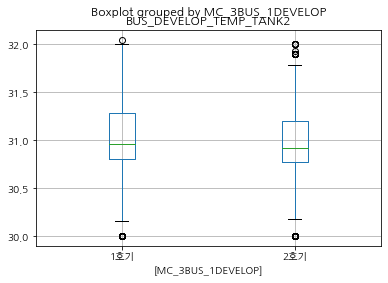

MC_6PHOS_2G_2DRY PHOS_G_DRY_TEMP_GLASS_START
statistic:(F) 3.986, p-value: 0.046
----------------------------------------------------------------------------------------------------


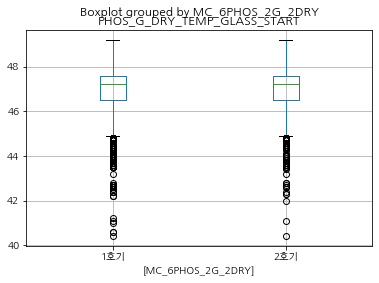

In [143]:
idx=0
for m in check_machine:
    for c in column_list[idx]:          
            
        fv, pv=fun_anova(machine_mod_process[[m,c]],m,c)
        if pv<=0.05:
            print(m,c)
            print("statistic:(F) {0:.3f}, p-value: {1:.3f}".format(fv, pv))
            print("-"*100)
            #fun_plot_hist(machine_mod_process, m, c, alpha = 0.5)
            machine_mod_process.boxplot(column = c, by = [m])
            plt.show()
#            fun_chi2(machine_mod_process, m,c)    
    idx+=1

In [38]:
mod_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 93 columns):
JUDGE                          4000 non-null object
LOT_ID                         4000 non-null object
PANEL_ID                       4000 non-null object
TIME_1BLACK                    4000 non-null object
TIME_2AG                       4000 non-null object
TIME_3BUS                      4000 non-null object
TIME_4DIELEC                   4000 non-null object
TIME_5MGO                      4000 non-null object
TIME_6PHOS                     4000 non-null object
TIME_7PASTE                    4000 non-null object
TIME_8AGING                    4000 non-null object
BLACK_RTD_TEMP_GLASS_START     4000 non-null float64
BLACK_RTD_TEMP_GLASS_END       4000 non-null float64
BLACK_RTD_TEMP_WALL_START      4000 non-null float64
BLACK_RTD_TEMP_WALL_MAX        4000 non-null float64
BLACK_RTD_PRES_START           4000 non-null float64
BLACK_RTD_PRES_END             4000 non-null float64
BLA

In [36]:
machine_mod_process.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Columns: 120 entries, JUDGE_x to MC_8AGING
dtypes: datetime64[ns](9), float64(82), object(29)
memory usage: 3.7+ MB


# 호기별 작업 시간의 차이를 알아보자

In [91]:
final_time=pd.read_csv("data/final_time.csv", encoding="cp949").drop("Unnamed: 0", axis=1)

In [92]:
machine_time=pd.merge(final_time, mfg_machine, on=['LOT_ID','PANEL_ID'], how="inner")
machine_time.head()

,JUDGE_x,LOT_ID,PANEL_ID,TIME_1BLACK_x,TIME_2AG_x,TIME_3BUS_x,TIME_4DIELEC_x,TIME_5MGO_x,TIME_6PHOS_x,TIME_7PASTE_x,...,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
0,양품,LOT-101,PNL-01,2019-04-01 0:01,2019-04-01 5:21,2019-04-01 11:01,2019-04-06 13:41,2019-04-11 3:41,2019-04-03 20:20,2019-04-11 12:41,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
1,양품,LOT-101,PNL-02,2019-04-01 0:45,2019-04-01 6:05,2019-04-01 11:45,2019-04-06 14:25,2019-04-11 4:25,2019-04-03 21:04,2019-04-11 13:25,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
2,양품,LOT-101,PNL-03,2019-04-01 1:29,2019-04-01 6:49,2019-04-01 12:29,2019-04-06 15:09,2019-04-11 5:09,2019-04-03 21:48,2019-04-11 14:09,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
3,양품,LOT-101,PNL-04,2019-04-01 2:13,2019-04-01 7:33,2019-04-01 13:13,2019-04-06 15:53,2019-04-11 5:53,2019-04-03 22:32,2019-04-11 14:53,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
4,양품,LOT-101,PNL-05,2019-04-01 2:58,2019-04-01 8:18,2019-04-01 13:58,2019-04-06 16:38,2019-04-11 6:38,2019-04-03 23:17,2019-04-11 15:38,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기


In [93]:
machine_time.columns

Index(['JUDGE_x', 'LOT_ID', 'PANEL_ID', 'TIME_1BLACK_x', 'TIME_2AG_x',
       'TIME_3BUS_x', 'TIME_4DIELEC_x', 'TIME_5MGO_x', 'TIME_6PHOS_x',
       'TIME_7PASTE_x', 'TIME_8AGING_x', 'TAT_1BLACK_1PRINT',
       'TAT_1BLACK_2RTD', 'TAT_2AG_1PRINT', 'TAT_2AG_2RTD',
       'TAT_2AG_3EXPOSURE', 'TAT_3BUS_1DEVELOP', 'TAT_3BUS_2FIRE',
       'TAT_4DIELEC_FIRE', 'TAT_5MGO', 'TAT_6PHOS_1R_1DISPENSER',
       'TAT_6PHOS_1R_2DRY', 'TAT_6PHOS_2G_1DISPENSER', 'TAT_6PHOS_2G_2DRY',
       'TAT_6PHOS_3B_1DISPENSER', 'TAT_6PHOS_4FIRE', 'TAT_7PASTE',
       'TAT_8AGING', 'JUDGE_y', 'DATE_1BLACK', 'TIME_1BLACK_y', 'TIME_2AG_y',
       'TIME_3BUS_y', 'TIME_4DIELEC_y', 'TIME_5MGO_y', 'TIME_6PHOS_y',
       'TIME_7PASTE_y', 'TIME_8AGING_y', 'MC_1BLACK_1PRINT', 'MC_1BLACK_2RTD',
       'MC_2AG_1PRINT', 'MC_2AG_2RTD', 'MC_2AG_3EXPOSURE', 'MC_3BUS_1DEVELOP',
       'MC_3BUS_2FIRE', 'MC_4DIELEC_1FIRE', 'MC_5MGO',
       'MC_6PHOS_1R_1DISPENSER', 'MC_6PHOS_1R_2DRY', 'MC_6PHOS_2G_1DISPENSER',
       'MC_6PHOS_2G

In [179]:
check_machine=['MC_2AG_2RTD','MC_3BUS_1DEVELOP','MC_6PHOS_2G_2DRY','MC_6PHOS_4FIRE','MC_4DIELEC_1FIRE']
cm_time=['TAT_2AG_2RTD','TAT_3BUS_1','TAT_6PHOS_2G_2DRY','TAT_6PHOS_4','TAT_4']


In [180]:
column_list=[]
total_list=[]
for c in cm_time:
    temp=fun_select_cols(machine_time,start=c)
    column_list.append(temp)
    total_list+=temp
column_list

[['TAT_2AG_2RTD'],
 ['TAT_3BUS_1DEVELOP'],
 ['TAT_6PHOS_2G_2DRY'],
 ['TAT_6PHOS_4FIRE'],
 ['TAT_4DIELEC_FIRE']]

In [181]:
idx=0
for m in check_machine:
    for c in column_list[idx]:          
            
        fv, pv=fun_anova(machine_time[[m,c]],m,c)
        if pv<=0.05:
        print(m,c)
        print("statistic:(F) {0:.3f}, p-value: {1:.3f}".format(fv, pv))
        print("-"*100)
                #fun_plot_hist(machine_time, m, c, alpha = 0.5)
            #plt.show()
            
#            fun_chi2(machine_mod_process, m,c)    
    idx+=1

MC_2AG_2RTD TAT_2AG_2RTD
statistic:(F) 0.037, p-value: 0.847
----------------------------------------------------------------------------------------------------
MC_3BUS_1DEVELOP TAT_3BUS_1DEVELOP
statistic:(F) 0.338, p-value: 0.561
----------------------------------------------------------------------------------------------------
MC_6PHOS_2G_2DRY TAT_6PHOS_2G_2DRY
statistic:(F) 0.126, p-value: 0.722
----------------------------------------------------------------------------------------------------
MC_6PHOS_4FIRE TAT_6PHOS_4FIRE
statistic:(F) 1.294, p-value: 0.255
----------------------------------------------------------------------------------------------------
MC_4DIELEC_1FIRE TAT_4DIELEC_FIRE
statistic:(F) 0.797, p-value: 0.372
----------------------------------------------------------------------------------------------------


In [182]:
machine_time.columns

Index(['JUDGE_x', 'LOT_ID', 'PANEL_ID', 'TIME_1BLACK_x', 'TIME_2AG_x',
       'TIME_3BUS_x', 'TIME_4DIELEC_x', 'TIME_5MGO_x', 'TIME_6PHOS_x',
       'TIME_7PASTE_x', 'TIME_8AGING_x', 'TAT_1BLACK_1PRINT',
       'TAT_1BLACK_2RTD', 'TAT_2AG_1PRINT', 'TAT_2AG_2RTD',
       'TAT_2AG_3EXPOSURE', 'TAT_3BUS_1DEVELOP', 'TAT_3BUS_2FIRE',
       'TAT_4DIELEC_FIRE', 'TAT_5MGO', 'TAT_6PHOS_1R_1DISPENSER',
       'TAT_6PHOS_1R_2DRY', 'TAT_6PHOS_2G_1DISPENSER', 'TAT_6PHOS_2G_2DRY',
       'TAT_6PHOS_3B_1DISPENSER', 'TAT_6PHOS_4FIRE', 'TAT_7PASTE',
       'TAT_8AGING', 'JUDGE_y', 'DATE_1BLACK', 'TIME_1BLACK_y', 'TIME_2AG_y',
       'TIME_3BUS_y', 'TIME_4DIELEC_y', 'TIME_5MGO_y', 'TIME_6PHOS_y',
       'TIME_7PASTE_y', 'TIME_8AGING_y', 'MC_1BLACK_1PRINT', 'MC_1BLACK_2RTD',
       'MC_2AG_1PRINT', 'MC_2AG_2RTD', 'MC_2AG_3EXPOSURE', 'MC_3BUS_1DEVELOP',
       'MC_3BUS_2FIRE', 'MC_4DIELEC_1FIRE', 'MC_5MGO',
       'MC_6PHOS_1R_1DISPENSER', 'MC_6PHOS_1R_2DRY', 'MC_6PHOS_2G_1DISPENSER',
       'MC_6PHOS_2G

In [184]:
idx=0
tat_variables=[]
for m in check_machine:
    for c in column_list[idx]:          
            
        fv, pv=fun_anova(machine_time[['JUDGE_x',c]],'JUDGE_x',c)
        if pv<=0.05:
            print(m,c)
            print("statistic:(F) {0:.3f}, p-value: {1:.3f}".format(fv, pv))
            print("-"*100)
            tat_variables.append(c)
                    #fun_plot_hist(machine_time, m, c, alpha = 0.5)
            #plt.show()
            
#            fun_chi2(machine_mod_process, m,c)    
    idx+=1

MC_2AG_2RTD TAT_2AG_2RTD
statistic:(F) 21.924, p-value: 0.000
----------------------------------------------------------------------------------------------------
MC_3BUS_1DEVELOP TAT_3BUS_1DEVELOP
statistic:(F) 20.614, p-value: 0.000
----------------------------------------------------------------------------------------------------
MC_6PHOS_2G_2DRY TAT_6PHOS_2G_2DRY
statistic:(F) 7.048, p-value: 0.008
----------------------------------------------------------------------------------------------------
MC_6PHOS_4FIRE TAT_6PHOS_4FIRE
statistic:(F) 3.866, p-value: 0.049
----------------------------------------------------------------------------------------------------
MC_4DIELEC_1FIRE TAT_4DIELEC_FIRE
statistic:(F) 349.263, p-value: 0.000
----------------------------------------------------------------------------------------------------


설비별 시간 유의 변수

In [185]:
tat_variables

['TAT_2AG_2RTD',
 'TAT_3BUS_1DEVELOP',
 'TAT_6PHOS_2G_2DRY',
 'TAT_6PHOS_4FIRE',
 'TAT_4DIELEC_FIRE']